# This notebook contains the code used to create all of the plots in my $\mathrm{M}_{\bullet}-\sigma$ paper

In [1]:
# Importing necessary packages
import sys
sys.path.append('/home/yja6qa/arepo_package/')

import arepo_package
import scipy.interpolate
import h5py
import os
import numpy as np
import plotting # Specific plotting preferences
from brahma_analysis_clean import *
from sklearn.linear_model import LinearRegression

%matplotlib inline

h = 0.6774

In [2]:
# Grabbing latex font for use on Rivanna
os.environ["MANPATH"] = "/standard/torrey-group/Share/texlive/2018/texmf-dist/doc/man:" + os.environ.get("MANPATH", "")
os.environ["INFOPATH"] = "/standard/torrey-group/Share/texlive/2018/texmf-dist/doc/info:" + os.environ.get("INFOPATH", "")
os.environ["PATH"] = "/standard/torrey-group/Share/texlive/2018/bin/x86_64-linux:/standard/torrey-group/Share/texlive/2018/texmf-dist:" + os.environ.get("PATH", "")

# Loading in data:

## Here are several relations and data points grabbed from other papers

In [3]:
# https://ui.adsabs.harvard.edu/abs/2021ApJ...921...36B/abstract
Bennert_21=np.array([1.7222222222222223, 5.980392156862745,1.8611111111111112, 6.568627450980392,1.9801587301587302, 7.098039215686274,2.0912698412698414, 7.568627450980392,2.1666666666666665, 7.901960784313726,2.253968253968254, 8.294117647058824,2.365079365079365, 8.784313725490197,2.492063492063492, 9.333333333333334,2.575396825396825, 9.686274509803923])

model=LinearRegression()

B21_x = list(np.arange(0,len(Bennert_21)-2,2))
B21_y=list(np.arange(1,len(Bennert_21)-1,2))

modelx=Bennert_21[B21_x].reshape(-1, 1)
modely=Bennert_21[B21_y].reshape(-1, 1)

model.fit(modelx,modely)

xfit=np.linspace(0.75,3,100)
B21_yfit=model.coef_*xfit + model.intercept_
B21_yfit = B21_yfit[0]

# https://ui.adsabs.harvard.edu/abs/2013ARA%26A..51..511K/abstract

Korm_Ho_M_Mstar=np.array([8.017615886326578, 5.212962962962962,8.274545772187281, 5.509259259259259,8.424935942231539, 5.685185185185185,8.581586303284416, 5.87037037037037,11.188358956440716, 8.916666666666666,10.724638947123225, 8.37962962962963,10.42388772420219, 8.018518518518519,9.809777544840438, 7.305555555555555,9.346057535522945, 6.768518518518518,9.045306312601909, 6.4074074074074066,8.731976473328675, 6.046296296296296,11.031679478220358, 8.74074074074074])

model=LinearRegression()

KH13_M_Mstar_x = list(np.arange(0,len(Korm_Ho_M_Mstar)-2,2))
KH13_M_Mstar_y=list(np.arange(1,len(Korm_Ho_M_Mstar)-1,2))

modelx=Korm_Ho_M_Mstar[KH13_M_Mstar_x].reshape(-1, 1)
modely=Korm_Ho_M_Mstar[KH13_M_Mstar_y].reshape(-1, 1)

model.fit(modelx,modely)

xfit_M_Mstar=np.linspace(7,12,100)
KH13_M_Mstar_yfit=model.coef_*xfit_M_Mstar + model.intercept_

KH13 = np.array([61.855616962692075, 1821326.5213157362, 72.34496404064545, 3627077.094324132, 88.76140246233794, 8746378.244534718, 103.81337677398248, 17417957.63569585, 114.24223595707086, 26535221.34559605, 128.48385722709747, 44483550.7425954, 154.9193338482966, 99364194.64493936, 182.77390084367508, 209570254.06233612, 208.25965723003674, 365028580.6959786, 250.01870711241457, 815374904.6051315, 278.7500658923807, 1315568824.8170788, 339.0403840662078, 3053265306.3106976, 414.1689937980016, 7362681452.704195, 461.7639841640528, 11879338119.839901])

model=LinearRegression()

KH13_x = list(np.arange(0,len(KH13)-2,2))
KH13_y=list(np.arange(1,len(KH13)-1,2))

modelx=np.log10(KH13[KH13_x]).reshape(-1, 1)
modely=np.log10(KH13[KH13_y]).reshape(-1, 1)

model.fit(modelx,modely)

xfit=np.linspace(0.75,3,100)
KH13_yfit=model.coef_*xfit + model.intercept_

# https://ui.adsabs.harvard.edu/abs/2024A%26A...691A.145M/abstract
Maiolino_et_al = np.array([1.9268858800773696, 5.656560658539877,1.6406189555125728, 6.172349421978319,1.7705996131528048, 6.298367144977734,1.872727272727273, 6.564324591786245,1.7705996131528048, 7.693715982187037,1.642166344294004, 7.707210651792542,1.9067698259187622, 7.88941118258288,1.928433268858801, 7.493747469749449,1.9315280464216635, 7.284400161936036,1.9021276595744683, 7.238315865233234,1.8541586073500969, 7.2157572758760296,1.9593810444874276, 7.132832531150196,1.9500967117988397, 7.353897710404391,1.9485493230174082, 6.865548108497144,1.9222437137330757, 6.8194188295623235])

Maiolino_x = Maiolino_et_al[list(np.arange(0,len(Maiolino_et_al)-2,2))]
Maiolino_y = Maiolino_et_al[list(np.arange(1,len(Maiolino_et_al)-1,2))]

Maiolino_M_Mstar = np.array([8.884142790589332, 5.6574074074074066,8.894945259725134, 6.222222222222221,9.78185418122525, 6.185185185185185,10.177702073142324, 6.305555555555555,10.173334498020033, 7.694444444444444,10.650681341719077, 7.898148148148148,9.770760540414628, 7.712962962962963,8.878348474260424, 7.5,8.43256464011181, 7.259259259259259,8.331586303284416, 7.37037037037037,8.093058467272304, 7.222222222222221,8.048771255532262, 7.305555555555555,7.778855112974609, 7.138888888888888,7.8677789424644775, 6.861111111111111,8.113993710691824, 6.564814814814814,8.377329373398556, 6.824074074074074])

Maiolino_x_M_Mstar = Maiolino_M_Mstar[list(np.arange(0,len(Maiolino_M_Mstar)-2,2))]
Maiolino_y_M_Mstar = Maiolino_M_Mstar[list(np.arange(1,len(Maiolino_M_Mstar)-1,2))]

Juodzbalis_et_al_msigma = np.array([1.6198933048041755, 7.44486692015209,1.7021729387442353, 7.247148288973383,1.643545518946349, 8.342205323193916,1.7598403909265712, 7.41444866920152,1.7903164712515722, 7.338403041825095,1.820619063453281, 7.490494296577946,1.7900504561291908, 7.688212927756653,1.854113837123567, 7.44486692015209,1.9026095505211873, 7.673003802281367,1.7722737064291807, 7.064638783269961,1.7784151859937256, 6.988593155893535,1.7785192788677011, 6.851711026615969,1.7878182422761641, 6.623574144486691,1.7971981668088306, 6.288973384030418,1.818571903598433, 6.182509505703421,1.9431016784975927, 6.425855513307984,1.955049227254984, 6.714828897338402,1.9276265378999264, 6.775665399239542,1.9640127802917493, 6.927756653992395,1.9334904364672036, 7.064638783269961,1.912186094926918, 7.079847908745246,1.887851494166462, 7.079847908745246,1.854426115745493, 7.034220532319391,1.9212074773381138, 7.2167300380228125,2.072639477222455, 8.083650190114067,2.078399282915757, 8.509505703422052,2.135893246974801, 8.904942965779465,2.0576848009946653, 7.749049429657793,2.0702684728707945, 7.201520912547528,2.1007445531957956, 7.125475285171102,2.149922653211699, 6.456273764258554])
Juodzbalis_et_al_mmstar = np.array([7.778625954198473, 6.304761904761904,8.541984732824426, 6.17142857142857,9.15267175572519, 6.4571428571428555,9.49618320610687, 6.419047619047618,10.31679389312977, 6.742857142857141,11.041984732824428, 7.219047619047617,9.515267175572518, 6.857142857142856,8.351145038167939, 6.628571428571427,8.84732824427481, 6.723809523809522,9, 7.047619047619047,8.942748091603052, 7.1428571428571415,9, 7.257142857142856,8.904580152671755, 7.447619047619046,8.541984732824426, 7.009523809523808,8.446564885496183, 7.1047619047619035,8.408396946564885, 7.028571428571427,8.274809160305344, 7.0857142857142845,8.16030534351145, 6.933333333333332,8.427480916030534, 7.428571428571427,9.19083969465649, 8.495238095238093,9.438931297709923, 7.219047619047617,9.763358778625953, 7.504761904761903,9.725190839694655, 7.7714285714285705,10.393129770992367, 7.333333333333332,10.16412213740458, 8.076190476190476,10.755725190839694, 7.695238095238094,10.946564885496183, 7.695238095238094])

Juodzbalis_et_al_msigma_x = Juodzbalis_et_al_msigma[list(np.arange(0,len(Juodzbalis_et_al_msigma)-2,2))]
Juodzbalis_et_al_msigma_y = Juodzbalis_et_al_msigma[list(np.arange(1,len(Juodzbalis_et_al_msigma)-1,2))]

Juodzbalis_et_al_mmstar_x = Juodzbalis_et_al_mmstar[list(np.arange(0,len(Juodzbalis_et_al_mmstar)-2,2))]
Juodzbalis_et_al_mmstar_y = Juodzbalis_et_al_mmstar[list(np.arange(1,len(Juodzbalis_et_al_mmstar)-1,2))]

# https://ui.adsabs.harvard.edu/abs/2023ApJ...957L...3P/abstract
Pacucchi_et_al = np.array([7.466494845360824, 5.523809523809525,7.93041237113402, 6.015873015873016,8.231958762886597, 6.341269841269842,8.664948453608247, 6.801587301587302,9.11340206185567, 7.277777777777779,9.585051546391753, 7.7857142857142865,9.987113402061855, 8.214285714285715,10.38144329896907, 8.626984126984127,10.621134020618555, 8.88888888888889,10.984536082474227, 9.26984126984127])

model=LinearRegression()

Pacucchi_model_x = list(np.arange(0,len(Pacucchi_et_al)-2,2))
Pacucchi_model_y= list(np.arange(1,len(Pacucchi_et_al)-1,2))

modelx=Pacucchi_et_al[Pacucchi_model_x].reshape(-1, 1)
modely=Pacucchi_et_al[Pacucchi_model_y].reshape(-1, 1)

model.fit(modelx,modely)

xfit_Pacucchi=np.linspace(5,12,100)
Pacucchi_yfit=model.coef_*xfit_Pacucchi + model.intercept_

# https://ui.adsabs.harvard.edu/abs/2015ApJ...813...82R/abstract
Reines_Volonteri = np.array([8.618461538461538, 4.92971199416697,8.963076923076922, 5.311192125410135,9.34, 5.6928909952606634,9.716923076923077, 6.098286547575647,9.986153846153847, 6.384469558877143,10.30923076923077, 6.718410499453154,10.524615384615384, 6.9568355814801315,10.804615384615385, 7.243091505650748,11.106153846153846, 7.576886620488516,11.42923076923077, 7.910827561064528,11.838461538461539, 8.34013853445133])

Reines_Volonteri_x = list(np.arange(0,len(Reines_Volonteri)-2,2))
Reines_Volonteri_y = list(np.arange(1,len(Reines_Volonteri)-1,2))

model=LinearRegression()

modelx=Reines_Volonteri[Reines_Volonteri_x].reshape(-1, 1)
modely=Reines_Volonteri[Reines_Volonteri_y].reshape(-1, 1)

model.fit(modelx,modely)

xfit_RV15=np.linspace(5,12.2,100)
RV15_yfit=model.coef_*xfit_RV15 + model.intercept_

RV15_up = np.array([8.683189655172413, 5.566983984311163, 9.049568965517242, 5.942658114070928, 9.34051724137931, 6.247957182546169, 9.696120689655173, 6.623733453178625, 10.202586206896552, 7.140259846380129, 10.612068965517242, 7.5629187775780355, 10.967672413793103, 7.9386950482104925, 11.398706896551724, 8.384846380127474, 11.72198275862069, 8.713535708449093, 11.905172413793103, 8.901372773328976])
RV15_down = np.array([8.704741379310345, 4.476732309200851, 9.168103448275861, 4.9462739009642105, 9.4375, 5.22808056872038, 9.814655172413794, 5.627349240071908, 10.08405172413793, 5.909155907828077, 10.47198275862069, 6.308322438306914, 10.78448275862069, 6.637113907501227, 11.140086206896552, 6.989193495669228, 11.323275862068966, 7.200727243013565, 11.538793103448276, 7.411954567739828, 11.743534482758621, 7.623284033338782, 11.926724137931036, 7.811121098218665])

RV15_up_x = list(np.arange(0,len(RV15_up)-2,2))
RV15_up_y = list(np.arange(1,len(RV15_up)-1,2))
RV15_down_x = list(np.arange(0,len(RV15_down)-2,2))
RV15_down_y = list(np.arange(1,len(RV15_down)-1,2))

modelup=LinearRegression()
modeldown=LinearRegression()

modelupx=RV15_up[RV15_up_x].reshape(-1, 1)
modelupy=RV15_up[RV15_up_y].reshape(-1, 1)
modeldownx=RV15_down[RV15_down_x].reshape(-1, 1)
modeldowny=RV15_down[RV15_down_y].reshape(-1, 1)

modelup.fit(modelupx,modelupy)
modeldown.fit(modeldownx,modeldowny)

xfit_RV15up=np.linspace(5,12.2,100)
RV15_yfitup=modelup.coef_*xfit_RV15up + modelup.intercept_
xfit_RV15down=np.linspace(5,12.2,100)
RV15_yfitdown=modeldown.coef_*xfit_RV15down + modeldown.intercept_

# Greene_et_al = np.array([1578022559.2487137, 43113.70885398935, 4059668445.4064784, 198644.67294786527, 12292002545.18395, 1117061.0862750604, 27758514840.550266, 4216965.034285823, 76221145562.89865, 20763840.890834585, 161267617462.40594, 64223254.2222937, 341207735070.5703, 226865904.37430137, 745832852761.4878, 749894209.3324559]) # AGN, later-type
# Greene_et_al = np.array([8.024070382844354, 3.7676607447075563, 8.469935307900041, 4.246666853557674, 8.994456836100653, 4.956605774176489, 9.394933433041867, 5.558979816171725, 9.76911807938521, 6.1726897488263335, 10.296469836710996, 7.062328285265972, 10.70656118561661, 7.802999334610973, 11.369591259720606, 9.107470138710468, 11.929458506121378, 10.316677187279717, 12.274838421800506, 11.117959632343446]), # Average

# model=LinearRegression()

# G20_x = list(np.arange(0,len(Greene_et_al)-2,2))
# G20_y= list(np.arange(1,len(Greene_et_al)-1,2))

# modelx=Greene_et_al[G20_x].reshape(-1, 1)
# modely=Greene_et_al[G20_y].reshape(-1, 1)

# model.fit(modelx,modely)

# xfit_G20=np.linspace(5,12.2,100)
# G20_yfit=model.coef_*xfit_G20 + model.intercept_
# G20_yfit = G20_yfit[0]


## Loading in BRAHMA data:

In [4]:
bFOF_decomp_z0 = ReadBrahmaData('Brahma_Data/bFOF_z0_decomp')
bFOF_decomp_z1 = ReadBrahmaData('Brahma_Data/bFOF_z1_decomp')
bFOF_decomp_z2 = ReadBrahmaData('Brahma_Data/bFOF_z2_decomp')
bFOF_decomp_z3 = ReadBrahmaData('Brahma_Data/bFOF_z3_decomp')
bFOF_decomp_z4 = ReadBrahmaData('Brahma_Data/bFOF_z4_decomp')
bFOF_decomp_z5 = ReadBrahmaData('Brahma_Data/bFOF_z5_decomp')
bFOF_decomp_z6 = ReadBrahmaData('Brahma_Data/bFOF_z6_decomp')
bFOF_decomp_z7 = ReadBrahmaData('Brahma_Data/bFOF_z7_decomp')

LW10_decomp_z0 = ReadBrahmaData('Brahma_Data/bFOF_LW10_z0_decomp')
LW10_decomp_z1 = ReadBrahmaData('Brahma_Data/bFOF_LW10_z1_decomp')
LW10_decomp_z2 = ReadBrahmaData('Brahma_Data/bFOF_LW10_z2_decomp')
LW10_decomp_z3 = ReadBrahmaData('Brahma_Data/bFOF_LW10_z3_decomp')
LW10_decomp_z4 = ReadBrahmaData('Brahma_Data/bFOF_LW10_z4_decomp')
LW10_decomp_z5 = ReadBrahmaData('Brahma_Data/bFOF_LW10_z5_decomp')
LW10_decomp_z6 = ReadBrahmaData('Brahma_Data/bFOF_LW10_z6_decomp')
LW10_decomp_z7 = ReadBrahmaData('Brahma_Data/bFOF_LW10_z7_decomp')

spin_decomp_z0 = ReadBrahmaData('Brahma_Data/bFOF_LW10_spin_z0_decomp')
spin_decomp_z1 = ReadBrahmaData('Brahma_Data/bFOF_LW10_spin_z1_decomp')
spin_decomp_z2 = ReadBrahmaData('Brahma_Data/bFOF_LW10_spin_z2_decomp')
spin_decomp_z3 = ReadBrahmaData('Brahma_Data/bFOF_LW10_spin_z3_decomp')
spin_decomp_z4 = ReadBrahmaData('Brahma_Data/bFOF_LW10_spin_z4_decomp')
spin_decomp_z5 = ReadBrahmaData('Brahma_Data/bFOF_LW10_spin_z5_decomp')
spin_decomp_z6 = ReadBrahmaData('Brahma_Data/bFOF_LW10_spin_z6_decomp')
spin_decomp_z7 = ReadBrahmaData('Brahma_Data/bFOF_LW10_spin_z7_decomp')

rich_decomp_z0 = ReadBrahmaData('Brahma_Data/bFOF_LW10_spin_rich_z0_decomp')
rich_decomp_z1 = ReadBrahmaData('Brahma_Data/bFOF_LW10_spin_rich_z1_decomp')
rich_decomp_z2 = ReadBrahmaData('Brahma_Data/bFOF_LW10_spin_rich_z2_decomp')
rich_decomp_z3 = ReadBrahmaData('Brahma_Data/bFOF_LW10_spin_rich_z3_decomp')
rich_decomp_z4 = ReadBrahmaData('Brahma_Data/bFOF_LW10_spin_rich_z4_decomp')
rich_decomp_z5 = ReadBrahmaData('Brahma_Data/bFOF_LW10_spin_rich_z5_decomp')
rich_decomp_z6 = ReadBrahmaData('Brahma_Data/bFOF_LW10_spin_rich_z6_decomp')
rich_decomp_z7 = ReadBrahmaData('Brahma_Data/bFOF_LW10_spin_rich_z7_decomp')

In [5]:
# Storing the BH masses
MBH_decomp_bFOFz0 = np.array(bFOF_decomp_z0[5])
MBH_decomp_bFOFz1 = np.array(bFOF_decomp_z1[5])
MBH_decomp_bFOFz2 = np.array(bFOF_decomp_z2[5])
MBH_decomp_bFOFz3 = np.array(bFOF_decomp_z3[5])
MBH_decomp_bFOFz4 = np.array(bFOF_decomp_z4[5])
MBH_decomp_bFOFz5 = np.array(bFOF_decomp_z5[5])
MBH_decomp_bFOFz6 = np.array(bFOF_decomp_z6[5])
MBH_decomp_bFOFz7 = np.array(bFOF_decomp_z7[5])

MBH_decomp_LW10z0 = np.array(LW10_decomp_z0[5])
MBH_decomp_LW10z1 = np.array(LW10_decomp_z1[5])
MBH_decomp_LW10z2 = np.array(LW10_decomp_z2[5])
MBH_decomp_LW10z3 = np.array(LW10_decomp_z3[5])
MBH_decomp_LW10z4 = np.array(LW10_decomp_z4[5])
MBH_decomp_LW10z5 = np.array(LW10_decomp_z5[5])
MBH_decomp_LW10z6 = np.array(LW10_decomp_z6[5])
MBH_decomp_LW10z7 = np.array(LW10_decomp_z7[5])

MBH_decomp_spinz0 = np.array(spin_decomp_z0[5])
MBH_decomp_spinz1 = np.array(spin_decomp_z1[5])
MBH_decomp_spinz2 = np.array(spin_decomp_z2[5])
MBH_decomp_spinz3 = np.array(spin_decomp_z3[5])
MBH_decomp_spinz4 = np.array(spin_decomp_z4[5])
MBH_decomp_spinz5 = np.array(spin_decomp_z5[5])
MBH_decomp_spinz6 = np.array(spin_decomp_z6[5])
MBH_decomp_spinz7 = np.array(spin_decomp_z7[5])

MBH_decomp_richz0 = np.array(rich_decomp_z0[5])
MBH_decomp_richz1 = np.array(rich_decomp_z1[5])
MBH_decomp_richz2 = np.array(rich_decomp_z2[5])
MBH_decomp_richz3 = np.array(rich_decomp_z3[5])
MBH_decomp_richz4 = np.array(rich_decomp_z4[5])
MBH_decomp_richz5 = np.array(rich_decomp_z5[5])
MBH_decomp_richz6 = np.array(rich_decomp_z6[5])
MBH_decomp_richz7 = np.array(rich_decomp_z7[5])

In [6]:
# Storing the stellar masses
Mstar_decomp_bFOFz0 = np.array(bFOF_decomp_z0[6])
Mstar_decomp_bFOFz1 = np.array(bFOF_decomp_z1[6])
Mstar_decomp_bFOFz2 = np.array(bFOF_decomp_z2[6])
Mstar_decomp_bFOFz3 = np.array(bFOF_decomp_z3[6])
Mstar_decomp_bFOFz4 = np.array(bFOF_decomp_z4[6])
Mstar_decomp_bFOFz5 = np.array(bFOF_decomp_z5[6])
Mstar_decomp_bFOFz6 = np.array(bFOF_decomp_z6[6])
Mstar_decomp_bFOFz7 = np.array(bFOF_decomp_z7[6])

Mstar_decomp_LW10z0 = np.array(LW10_decomp_z0[6])
Mstar_decomp_LW10z1 = np.array(LW10_decomp_z1[6])
Mstar_decomp_LW10z2 = np.array(LW10_decomp_z2[6])
Mstar_decomp_LW10z3 = np.array(LW10_decomp_z3[6])
Mstar_decomp_LW10z4 = np.array(LW10_decomp_z4[6])
Mstar_decomp_LW10z5 = np.array(LW10_decomp_z5[6])
Mstar_decomp_LW10z6 = np.array(LW10_decomp_z6[6])
Mstar_decomp_LW10z7 = np.array(LW10_decomp_z7[6])

Mstar_decomp_spinz0 = np.array(spin_decomp_z0[6])
Mstar_decomp_spinz1 = np.array(spin_decomp_z1[6])
Mstar_decomp_spinz2 = np.array(spin_decomp_z2[6])
Mstar_decomp_spinz3 = np.array(spin_decomp_z3[6])
Mstar_decomp_spinz4 = np.array(spin_decomp_z4[6])
Mstar_decomp_spinz5 = np.array(spin_decomp_z5[6])
Mstar_decomp_spinz6 = np.array(spin_decomp_z6[6])
Mstar_decomp_spinz7 = np.array(spin_decomp_z7[6])

Mstar_decomp_richz0 = np.array(rich_decomp_z0[6])
Mstar_decomp_richz1 = np.array(rich_decomp_z1[6])
Mstar_decomp_richz2 = np.array(rich_decomp_z2[6])
Mstar_decomp_richz3 = np.array(rich_decomp_z3[6])
Mstar_decomp_richz4 = np.array(rich_decomp_z4[6])
Mstar_decomp_richz5 = np.array(rich_decomp_z5[6])
Mstar_decomp_richz6 = np.array(rich_decomp_z6[6])
Mstar_decomp_richz7 = np.array(rich_decomp_z7[6])

In [7]:
# Storing the bulge sigma's
Sigma_bulge_bFOFz0 = np.linalg.norm(bFOF_decomp_z0[1],axis=1)
Sigma_bulge_bFOFz1 = np.linalg.norm(bFOF_decomp_z1[1],axis=1)
Sigma_bulge_bFOFz2 = np.linalg.norm(bFOF_decomp_z2[1],axis=1)
Sigma_bulge_bFOFz3 = np.linalg.norm(bFOF_decomp_z3[1],axis=1)
Sigma_bulge_bFOFz4 = np.linalg.norm(bFOF_decomp_z4[1],axis=1)
Sigma_bulge_bFOFz5 = np.linalg.norm(bFOF_decomp_z5[1],axis=1)
Sigma_bulge_bFOFz6 = np.linalg.norm(bFOF_decomp_z6[1],axis=1)
Sigma_bulge_bFOFz7 = np.linalg.norm(bFOF_decomp_z7[1],axis=1)

Sigma_bulge_LW10z0 = np.linalg.norm(LW10_decomp_z0[1],axis=1)
Sigma_bulge_LW10z1 = np.linalg.norm(LW10_decomp_z1[1],axis=1)
Sigma_bulge_LW10z2 = np.linalg.norm(LW10_decomp_z2[1],axis=1)
Sigma_bulge_LW10z3 = np.linalg.norm(LW10_decomp_z3[1],axis=1)
Sigma_bulge_LW10z4 = np.linalg.norm(LW10_decomp_z4[1],axis=1)
Sigma_bulge_LW10z5 = np.linalg.norm(LW10_decomp_z5[1],axis=1)
Sigma_bulge_LW10z6 = np.linalg.norm(LW10_decomp_z6[1],axis=1)
Sigma_bulge_LW10z7 = np.linalg.norm(LW10_decomp_z7[1],axis=1)

Sigma_bulge_spinz0 = np.linalg.norm(spin_decomp_z0[1],axis=1)
Sigma_bulge_spinz1 = np.linalg.norm(spin_decomp_z1[1],axis=1)
Sigma_bulge_spinz2 = np.linalg.norm(spin_decomp_z2[1],axis=1)
Sigma_bulge_spinz3 = np.linalg.norm(spin_decomp_z3[1],axis=1)
Sigma_bulge_spinz4 = np.linalg.norm(spin_decomp_z4[1],axis=1)
Sigma_bulge_spinz5 = np.linalg.norm(spin_decomp_z5[1],axis=1)
Sigma_bulge_spinz6 = np.linalg.norm(spin_decomp_z6[1],axis=1)
Sigma_bulge_spinz7 = np.linalg.norm(spin_decomp_z7[1],axis=1)

Sigma_bulge_richz0 = np.linalg.norm(rich_decomp_z0[1],axis=1)
Sigma_bulge_richz1 = np.linalg.norm(rich_decomp_z1[1],axis=1)
Sigma_bulge_richz2 = np.linalg.norm(rich_decomp_z2[1],axis=1)
Sigma_bulge_richz3 = np.linalg.norm(rich_decomp_z3[1],axis=1)
Sigma_bulge_richz4 = np.linalg.norm(rich_decomp_z4[1],axis=1)
Sigma_bulge_richz5 = np.linalg.norm(rich_decomp_z5[1],axis=1)
Sigma_bulge_richz6 = np.linalg.norm(rich_decomp_z6[1],axis=1)
Sigma_bulge_richz7 = np.linalg.norm(rich_decomp_z7[1],axis=1)

## Loading in IllustrisTNG data:

In [8]:
TNGz0_0 = ReadBrahmaData('Brahma_Data/Kin_Decomp_TNG_z0_0')
TNGz0_1 = ReadBrahmaData('Brahma_Data/Kin_Decomp_TNG_z0_2000')
TNGz0_2 = ReadBrahmaData('Brahma_Data/Kin_Decomp_TNG_z0_4000')
TNGz0_3 = ReadBrahmaData('Brahma_Data/Kin_Decomp_TNG_z0_6000')
TNGz0_4 = ReadBrahmaData('Brahma_Data/Kin_Decomp_TNG_z0_8000')
TNGz0_5 = ReadBrahmaData('Brahma_Data/Kin_Decomp_TNG_z0_10000')
TNGz0_6 = ReadBrahmaData('Brahma_Data/Kin_Decomp_TNG_z0_12000')
TNGz0_7 = ReadBrahmaData('Brahma_Data/Kin_Decomp_TNG_z0_14000')
TNGz0_8 = ReadBrahmaData('Brahma_Data/Kin_Decomp_TNG_z0_16000')
TNGz0_9 = ReadBrahmaData('Brahma_Data/Kin_Decomp_TNG_z0_18000')
TNGz5 = ReadBrahmaData('Brahma_Data/Kin_Decomp_TNG_z5')

TNG_z0_sigmas = np.linalg.norm(np.concatenate((TNGz0_0[0],TNGz0_1[0],TNGz0_2[0],TNGz0_3[0],TNGz0_4[0],TNGz0_5[0],TNGz0_6[0],
                                               TNGz0_7[0],TNGz0_8[0],TNGz0_9[0])), axis=1 )
TNG_z0_BHs = np.concatenate((TNGz0_0[1],TNGz0_1[1],TNGz0_2[1],TNGz0_3[1],TNGz0_4[1],TNGz0_5[1],TNGz0_6[1],TNGz0_7[1],TNGz0_8[1],TNGz0_9[1]))
TNG_z0_Mstars = np.concatenate((TNGz0_0[2],TNGz0_1[2],TNGz0_2[2],TNGz0_3[2],TNGz0_4[2],TNGz0_5[2],TNGz0_6[2],TNGz0_7[2],TNGz0_8[2],TNGz0_9[2]))

TNG_z5_sigmas = np.linalg.norm(TNGz5[0],axis=1)
TNG_z5_BHs = np.array(TNGz5[1])
TNG_z5_Mstars = np.array(TNGz5[2])

# BH number density plot

In [9]:
path_to_output='/standard/torrey-group/BRAHMA/L12p5n512' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio10_SFMFGM5_seed5.00_' # Base name included in every box
box='bFOF'
basePath = path_to_output+run+output+box # Combining paths to read data in 
desired_redshift = 0
file_format='fof_subfind'

output_redshift,output_snapshot=arepo_package.desired_redshift_to_output_redshift(basePath,
                                                                    desired_redshift,list_all=False,file_format=file_format)
hdr  = il.groupcat.loadHeader(basePath, output_snapshot)
h = hdr['HubbleParam'] ## load in h from the header
box_size = hdr['BoxSize']

In [10]:
# Setting path and constants for this job
path_to_output='/standard/torrey-group/BRAHMA/L12p5n512' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio10_SFMFGM5_seed5.00_' # Base name included in every box

# A few settings/constants:
kpc2km=3.0857e16 # Conversion from kpc to km for units

# Change these!
boxes = ['bFOF','bFOF_LW10','bFOF_LW10_spin','bFOF_LW10_spin_rich'] # Name of the box we want to load data from
desired_redshifts=np.arange(30) # Redshift of box that I want

n_BHs = {}

# Loading BRAHMA BH number densities
for box in boxes:
    basePath = path_to_output+run+output+box # Combining paths to read data in 

    n = []
    for z in desired_redshifts:
        SubhaloLenType,o = arepo_package.get_subhalo_property(basePath,'SubhaloLenType',z,postprocessed=1)
        SubhaloBHLen = SubhaloLenType[:,5]
        volume = (1e-3*box_size/h)**3 # Converting to cMpc from ckpc/h
        n.append(np.sum(SubhaloBHLen)/volume)
        
    n_BHs[box] = n

# TNG number densities, taken from https://arxiv.org/pdf/2411.19332
TNGx = [8.01324503311259, 6.88741721854305, 6.026490066225165, 4.900662251655632, 2.9801324503311264, 0.9271523178807968, 0.13245033112583116]
TNGy = [0.00019205293023825403,0.0006494969092577519,0.001824099804287269,0.004614559489491415,0.015654984788275376,0.02675521774083192,0.028294197173103053]

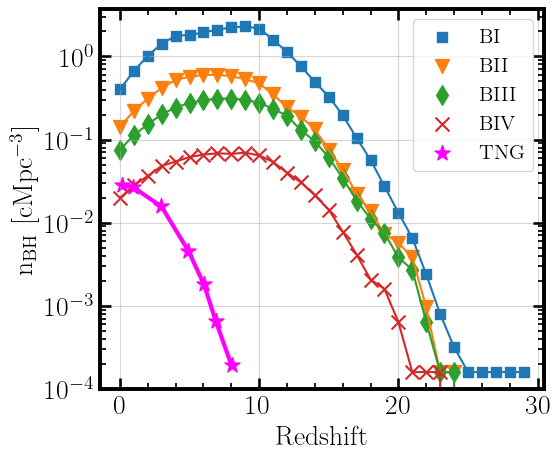

In [11]:
plt.figure(figsize=(6,5))
boxnames = ['BI','BII','BIII','BIV']
markers = ["s","v","d","x"]
sizes = [60,100,100,100]

for i in range(len(boxes)):
    plt.scatter(desired_redshifts,n_BHs[boxes[i]],marker = markers[i],label=boxnames[i],s=sizes[i])    
    plt.plot(desired_redshifts,n_BHs[boxes[i]])

plt.plot(TNGx,TNGy,color='magenta',lw=3)
plt.scatter(TNGx,TNGy,color='magenta',marker = '*',label='TNG',s=130)

plt.yscale('log')
plt.legend(fontsize=15,loc=1)
plt.ylabel(r'$\mathrm{n_{BH}\ [cMpc^{-3}]}$')
plt.xlabel('Redshift')
plt.grid(alpha=0.5)
plt.tight_layout()
plt.savefig('Plots/Paper_Figs/Brahma_BH_n.pdf',bbox_inches='tight')

# Full scatter $\mathrm{M}_\bullet - \sigma$

In [12]:
# List of BH Masses
Prop2list=[[np.array(MBH_decomp_bFOFz5),np.array(MBH_decomp_bFOFz0)],[np.array(MBH_decomp_richz5),np.array(MBH_decomp_richz0)]]

# List of Sigmas
Prop1list=[[np.array(Sigma_bulge_bFOFz5),np.array(Sigma_bulge_bFOFz0)],[np.array(Sigma_bulge_richz5),np.array(Sigma_bulge_richz0)]]

# Limits for making plot in log space
limitsMsigma=[1,2.4]

redshifts=[5,0]
AllBoxMeans,AllBoxIQRs,Xpoints = median_trends_adj(Prop1list,Prop2list,redshifts,limitsMsigma,bins=10)

/sfs/gpfs/tardis/home/yja6qa/arepo_package/brahma_analysis_clean.py:145: RuntimeWarning: divide by zero encountered in log10
  ids = np.where(np.logical_and(np.log10(Prop1list[i][ii])>=bins[iii],
/sfs/gpfs/tardis/home/yja6qa/arepo_package/brahma_analysis_clean.py:146: RuntimeWarning: divide by zero encountered in log10
  np.log10(Prop1list[i][ii])<=bins[iii+1]))[0]


/tmp/ipykernel_588965/2125929555.py:5: RuntimeWarning: divide by zero encountered in log10
  mask1 = (~np.isnan(np.log10(Sigma_bulge_bFOFz5))) & (~np.isinf(np.log10(Sigma_bulge_bFOFz5)))
/tmp/ipykernel_588965/2125929555.py:7: RuntimeWarning: divide by zero encountered in log10
  mask3 = (~np.isnan(np.log10(Sigma_bulge_richz5))) & (~np.isinf(np.log10(Sigma_bulge_richz5)))
/tmp/ipykernel_588965/2125929555.py:10: RuntimeWarning: divide by zero encountered in log10
  counts1, xedges1, yedges1, im1 = axs[0,0].hist2d(np.log10(Sigma_bulge_bFOFz5)[mask1],np.log10(MBH_decomp_bFOFz5)[mask1],
/tmp/ipykernel_588965/2125929555.py:15: RuntimeWarning: divide by zero encountered in log10
  counts3, xedges3, yedges3, im3 = axs[0,1].hist2d(np.log10(Sigma_bulge_richz5)[mask3],np.log10(MBH_decomp_richz5)[mask3],


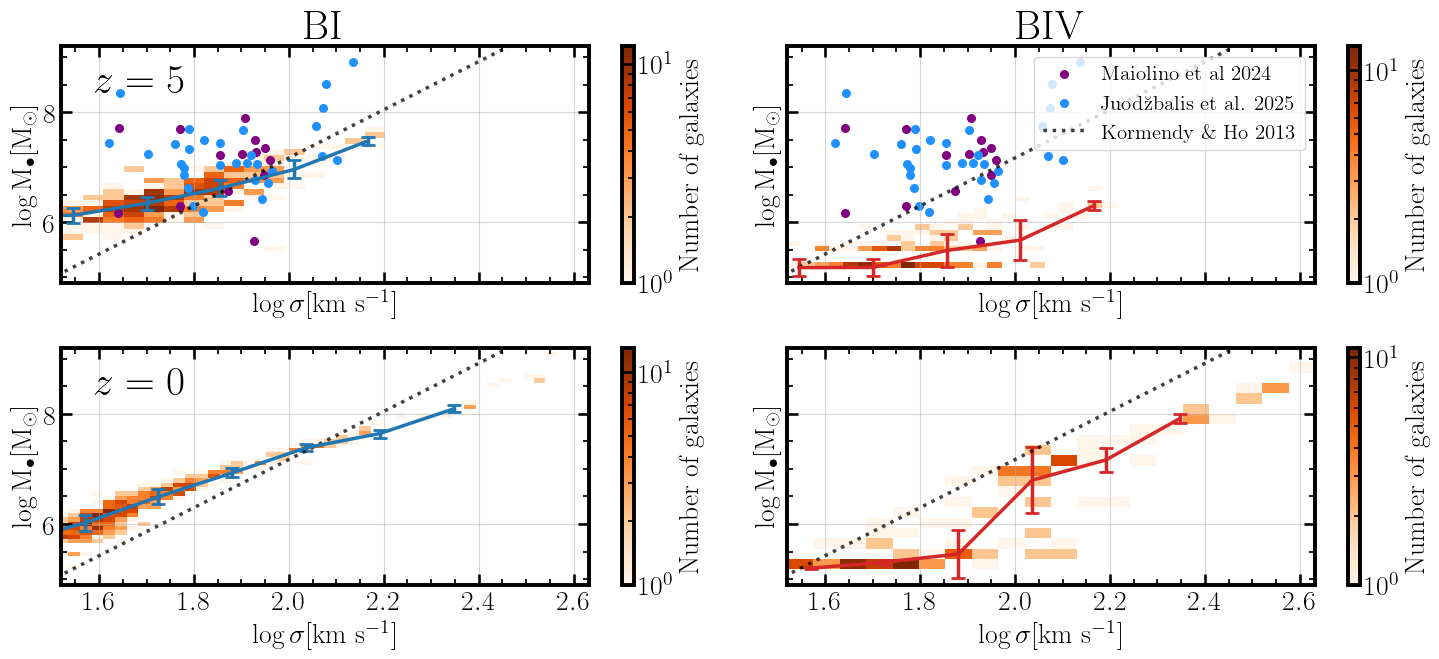

In [13]:
fig,axs = plt.subplots(2,2,figsize=(15,7),sharex=True,sharey=True)
colors = ['#1f77b4','#d62728']

# Removing nans
mask1 = (~np.isnan(np.log10(Sigma_bulge_bFOFz5))) & (~np.isinf(np.log10(Sigma_bulge_bFOFz5)))
mask2 = (~np.isnan(np.log10(Sigma_bulge_bFOFz0))) & (~np.isinf(np.log10(Sigma_bulge_bFOFz0)))
mask3 = (~np.isnan(np.log10(Sigma_bulge_richz5))) & (~np.isinf(np.log10(Sigma_bulge_richz5)))
mask4 = (~np.isnan(np.log10(Sigma_bulge_richz0))) & (~np.isinf(np.log10(Sigma_bulge_richz0)))

counts1, xedges1, yedges1, im1 = axs[0,0].hist2d(np.log10(Sigma_bulge_bFOFz5)[mask1],np.log10(MBH_decomp_bFOFz5)[mask1],
                                               norm='log',bins=(22,22),cmap='Oranges')
counts2, xedges2, yedges2, im2 = axs[1,0].hist2d(np.log10(Sigma_bulge_bFOFz0)[mask2],np.log10(MBH_decomp_bFOFz0)[mask2],
                                               norm='log',bins=(50,50),cmap='Oranges')

counts3, xedges3, yedges3, im3 = axs[0,1].hist2d(np.log10(Sigma_bulge_richz5)[mask3],np.log10(MBH_decomp_richz5)[mask3],
                                               norm='log',bins=(26,15),cmap='Oranges')
counts4, xedges4, yedges4, im4 = axs[1,1].hist2d(np.log10(Sigma_bulge_richz0)[mask4],np.log10(MBH_decomp_richz0)[mask4],
                                               norm='log',bins=(20,20),cmap='Oranges')
for i in range(2):
    for ii in range(2):
        axs[ii,i].errorbar(Xpoints[ii],AllBoxMeans[i,ii],yerr = AllBoxIQRs[i,ii],color=colors[i],lw=2.5,capsize=5,capthick=2)            

axs[0,0].text(0.15, 0.85, r'$z=5$', horizontalalignment='center', verticalalignment='center', transform=axs[0,0].transAxes,size=30)
axs[1,0].text(0.15, 0.85, r'$z=0$', horizontalalignment='center', verticalalignment='center', transform=axs[1,0].transAxes,size=30)
axs[0,0].scatter(Maiolino_x,Maiolino_y,color='purple',s=30)
axs[0,1].scatter(Maiolino_x,Maiolino_y,color='purple',s=30,label = 'Maiolino et al 2024')
axs[0,0].scatter(Juodzbalis_et_al_msigma_x,Juodzbalis_et_al_msigma_y,color='dodgerblue',s=30)
axs[0,1].scatter(Juodzbalis_et_al_msigma_x,Juodzbalis_et_al_msigma_y,color='dodgerblue',s=30,label = r'Juod\u{z}balis et al. 2025')

for ax in axs.flatten():
    ax.grid(alpha=0.5)
    if ax == axs.flatten()[1]:
        # ax.plot(xfit,B21_yfit,ls='dotted',lw=2.5,alpha=0.75,color='black',label = r'Bennert et al. 2021') 
        ax.plot(xfit,KH13_yfit[0],ls='dotted',lw=2.5,alpha=0.75,color='black',label = r'Kormendy \& Ho 2013') 
    else:
        # ax.plot(xfit,B21_yfit,ls='dotted',lw=2.5,alpha=0.75,color='black')
        ax.plot(xfit,KH13_yfit[0],ls='dotted',lw=2.5,alpha=0.75,color='black') 

    # ax.set_xlim(6,12)
    ax.set_ylim(4.9,9.2)
    ax.set_xlabel(r'$\mathrm{\log \sigma [km\ s^{-1}]}$',size=20)
    ax.set_ylabel(r'$\mathrm{\log M_{\bullet} [M_{\odot}]}$',size=20)

axs[0,0].set_title('BI',size=30)
axs[0,1].set_title('BIV',size=30)
axs[0,1].legend(fontsize=15,loc=1)
fig.colorbar(im1, ax=axs[0,0],label='Number of galaxies')
fig.colorbar(im2, ax=axs[1,0],label='Number of galaxies')
fig.colorbar(im3, ax=axs[0,1],label='Number of galaxies')
fig.colorbar(im4, ax=axs[1,1],label='Number of galaxies')

fig.tight_layout()
fig.savefig('Plots/Paper_Figs/SM5_spin_MBH_sigma_hist2d.pdf')

# Mega plot with 3 scaling relations for each simulation

### M-sigma portion:

In [14]:
# List of sigmas
Prop1list=[[Sigma_bulge_bFOFz7,Sigma_bulge_bFOFz6,Sigma_bulge_bFOFz5,Sigma_bulge_bFOFz4,Sigma_bulge_bFOFz3,
            Sigma_bulge_bFOFz2,Sigma_bulge_bFOFz1,Sigma_bulge_bFOFz0],
          [Sigma_bulge_LW10z7,Sigma_bulge_LW10z6,Sigma_bulge_LW10z5,Sigma_bulge_LW10z4,Sigma_bulge_LW10z3,
           Sigma_bulge_LW10z2,Sigma_bulge_LW10z1,Sigma_bulge_LW10z0],
          [Sigma_bulge_spinz7,Sigma_bulge_spinz6,Sigma_bulge_spinz5,Sigma_bulge_spinz4,Sigma_bulge_spinz3,
           Sigma_bulge_spinz2,Sigma_bulge_spinz1,Sigma_bulge_spinz0],
          [Sigma_bulge_richz7,Sigma_bulge_richz6,Sigma_bulge_richz5,Sigma_bulge_richz4,Sigma_bulge_richz3,
           Sigma_bulge_richz2,Sigma_bulge_richz1,Sigma_bulge_richz0]]

# List of BH Masses
Prop2list=[[MBH_decomp_bFOFz7,MBH_decomp_bFOFz6,MBH_decomp_bFOFz5,MBH_decomp_bFOFz4,MBH_decomp_bFOFz3,MBH_decomp_bFOFz2,
            MBH_decomp_bFOFz1,MBH_decomp_bFOFz0],
           [MBH_decomp_LW10z7,MBH_decomp_LW10z6,MBH_decomp_LW10z5,MBH_decomp_LW10z4,MBH_decomp_LW10z3,MBH_decomp_LW10z2,
            MBH_decomp_LW10z1,MBH_decomp_LW10z0],
           [MBH_decomp_spinz7,MBH_decomp_spinz6,MBH_decomp_spinz5,MBH_decomp_spinz4,MBH_decomp_spinz3,MBH_decomp_spinz2,
            MBH_decomp_spinz1,MBH_decomp_spinz0],
           [MBH_decomp_richz7,MBH_decomp_richz6,MBH_decomp_richz5,MBH_decomp_richz4,MBH_decomp_richz3,MBH_decomp_richz2,
            MBH_decomp_richz1,MBH_decomp_richz0]]

# Limits for making plot in log space
limits=[1,2.4]

In [15]:
redshifts=[7,6,5,4,3,2,1,0]
MsigmaMeans,MsigmaIQRs,MsigmaXpoints = median_trends_adj(Prop1list,Prop2list,redshifts,limits,bins=8)

In [16]:
# Binning as above for Illustris TNG
IllProp1 = [[TNG_z5_sigmas,TNG_z0_sigmas]]
IllProp2 = [[TNG_z5_BHs,TNG_z0_BHs]]

redshiftIll = [5,0]
limitsTNG=[0.6,2.7]
Msigma_TNG_means,Msigma_TNG_IQRs,Msigma_TNG_Xpoints = median_trends(IllProp1,IllProp2,redshiftIll,limitsTNG,bins=10)

### M-Mstar portion

In [17]:
# List of stellar masses
Prop1list=[[Mstar_decomp_bFOFz7,Mstar_decomp_bFOFz6,Mstar_decomp_bFOFz5,Mstar_decomp_bFOFz4,Mstar_decomp_bFOFz3,Mstar_decomp_bFOFz2,
           Mstar_decomp_bFOFz1,Mstar_decomp_bFOFz0],
           
           [Mstar_decomp_LW10z7,Mstar_decomp_LW10z6,Mstar_decomp_LW10z5,Mstar_decomp_LW10z4,Mstar_decomp_LW10z3,Mstar_decomp_LW10z2,
            Mstar_decomp_LW10z1,Mstar_decomp_LW10z0],
           
           [Mstar_decomp_spinz7,Mstar_decomp_spinz6,Mstar_decomp_spinz5,Mstar_decomp_spinz4,Mstar_decomp_spinz3,Mstar_decomp_spinz2,
            Mstar_decomp_spinz1,Mstar_decomp_spinz0],
           
           [Mstar_decomp_richz7,Mstar_decomp_richz6,Mstar_decomp_richz5,Mstar_decomp_richz4,Mstar_decomp_richz3,Mstar_decomp_richz2,
            Mstar_decomp_richz1,Mstar_decomp_richz0]]

# List of BH Masses
Prop2list=[[MBH_decomp_bFOFz7,MBH_decomp_bFOFz6,MBH_decomp_bFOFz5,MBH_decomp_bFOFz4,MBH_decomp_bFOFz3,MBH_decomp_bFOFz2,
            MBH_decomp_bFOFz1,MBH_decomp_bFOFz0],
           [MBH_decomp_LW10z7,MBH_decomp_LW10z6,MBH_decomp_LW10z5,MBH_decomp_LW10z4,MBH_decomp_LW10z3,MBH_decomp_LW10z2,
            MBH_decomp_LW10z1,MBH_decomp_LW10z0],
           [MBH_decomp_spinz7,MBH_decomp_spinz6,MBH_decomp_spinz5,MBH_decomp_spinz4,MBH_decomp_spinz3,MBH_decomp_spinz2,
            MBH_decomp_spinz1,MBH_decomp_spinz0],
           [MBH_decomp_richz7,MBH_decomp_richz6,MBH_decomp_richz5,MBH_decomp_richz4,MBH_decomp_richz3,MBH_decomp_richz2,
            MBH_decomp_richz1,MBH_decomp_richz0]]

# Limits for making plot in log space
limitsMstar=[6.4,11.5]

In [18]:
redshifts=[7,6,5,4,3,2,1,0]
MMstarMeans,MMstarIQRs,MMstarXpoints = median_trends_adj(Prop1list,Prop2list,redshifts,limitsMstar,bins=10)

In [19]:
# Binning as above for Illustris TNG
IllProp1 = [[TNG_z5_Mstars,TNG_z0_Mstars]]
IllProp2 = [[TNG_z5_BHs,TNG_z0_BHs]]

redshiftIll = [5,0]
limitsMstarTNG=[6.4,12.3]
MMstar_TNG_means,MMstar_TNG_IQRs,MMstar_TNG_Xpoints = median_trends(IllProp1,IllProp2,redshiftIll,limitsMstarTNG,bins=15)

### Mstar - sigma portion:

In [20]:
# List of sigmas
Prop1list=[[Sigma_bulge_bFOFz7,Sigma_bulge_bFOFz6,Sigma_bulge_bFOFz5,Sigma_bulge_bFOFz4,Sigma_bulge_bFOFz3,
            Sigma_bulge_bFOFz2,Sigma_bulge_bFOFz1,Sigma_bulge_bFOFz0],
          [Sigma_bulge_LW10z7,Sigma_bulge_LW10z6,Sigma_bulge_LW10z5,Sigma_bulge_LW10z4,Sigma_bulge_LW10z3,
           Sigma_bulge_LW10z2,Sigma_bulge_LW10z1,Sigma_bulge_LW10z0],
          [Sigma_bulge_spinz7,Sigma_bulge_spinz6,Sigma_bulge_spinz5,Sigma_bulge_spinz4,Sigma_bulge_spinz3,
           Sigma_bulge_spinz2,Sigma_bulge_spinz1,Sigma_bulge_spinz0],
          [Sigma_bulge_richz7,Sigma_bulge_richz6,Sigma_bulge_richz5,Sigma_bulge_richz4,Sigma_bulge_richz3,
           Sigma_bulge_richz2,Sigma_bulge_richz1,Sigma_bulge_richz0]]

# List of stellar masses
Prop2list=[[Mstar_decomp_bFOFz7,Mstar_decomp_bFOFz6,Mstar_decomp_bFOFz5,Mstar_decomp_bFOFz4,Mstar_decomp_bFOFz3,Mstar_decomp_bFOFz2,
           Mstar_decomp_bFOFz1,Mstar_decomp_bFOFz0],
           
           [Mstar_decomp_LW10z7,Mstar_decomp_LW10z6,Mstar_decomp_LW10z5,Mstar_decomp_LW10z4,Mstar_decomp_LW10z3,Mstar_decomp_LW10z2,
            Mstar_decomp_LW10z1,Mstar_decomp_LW10z0],
           
           [Mstar_decomp_spinz7,Mstar_decomp_spinz6,Mstar_decomp_spinz5,Mstar_decomp_spinz4,Mstar_decomp_spinz3,Mstar_decomp_spinz2,
            Mstar_decomp_spinz1,Mstar_decomp_spinz0],
           
           [Mstar_decomp_richz7,Mstar_decomp_richz6,Mstar_decomp_richz5,Mstar_decomp_richz4,Mstar_decomp_richz3,Mstar_decomp_richz2,
            Mstar_decomp_richz1,Mstar_decomp_richz0]]

# Limits for making plot in log space
limits=[1,2.4]

In [21]:
redshifts=[7,6,5,4,3,2,1,0]
MstarsigmaMeans,MstarsigmaIQRs,MstarsigmaXpoints = median_trends_adj(Prop1list,Prop2list,redshifts,limits,bins=10)

In [22]:
# Binning as above for Illustris TNG
IllProp1 = [[TNG_z5_sigmas,TNG_z0_sigmas]]
IllProp2 = [[TNG_z5_Mstars,TNG_z0_Mstars]]

redshiftIll = [5,0]
Mstarsigma_TNG_means,Mstarsigma_TNG_IQRs,Mstarsigma_TNG_Xpoints = median_trends(IllProp1,IllProp2,redshiftIll,limitsTNG,bins=10)

### Now plotting:

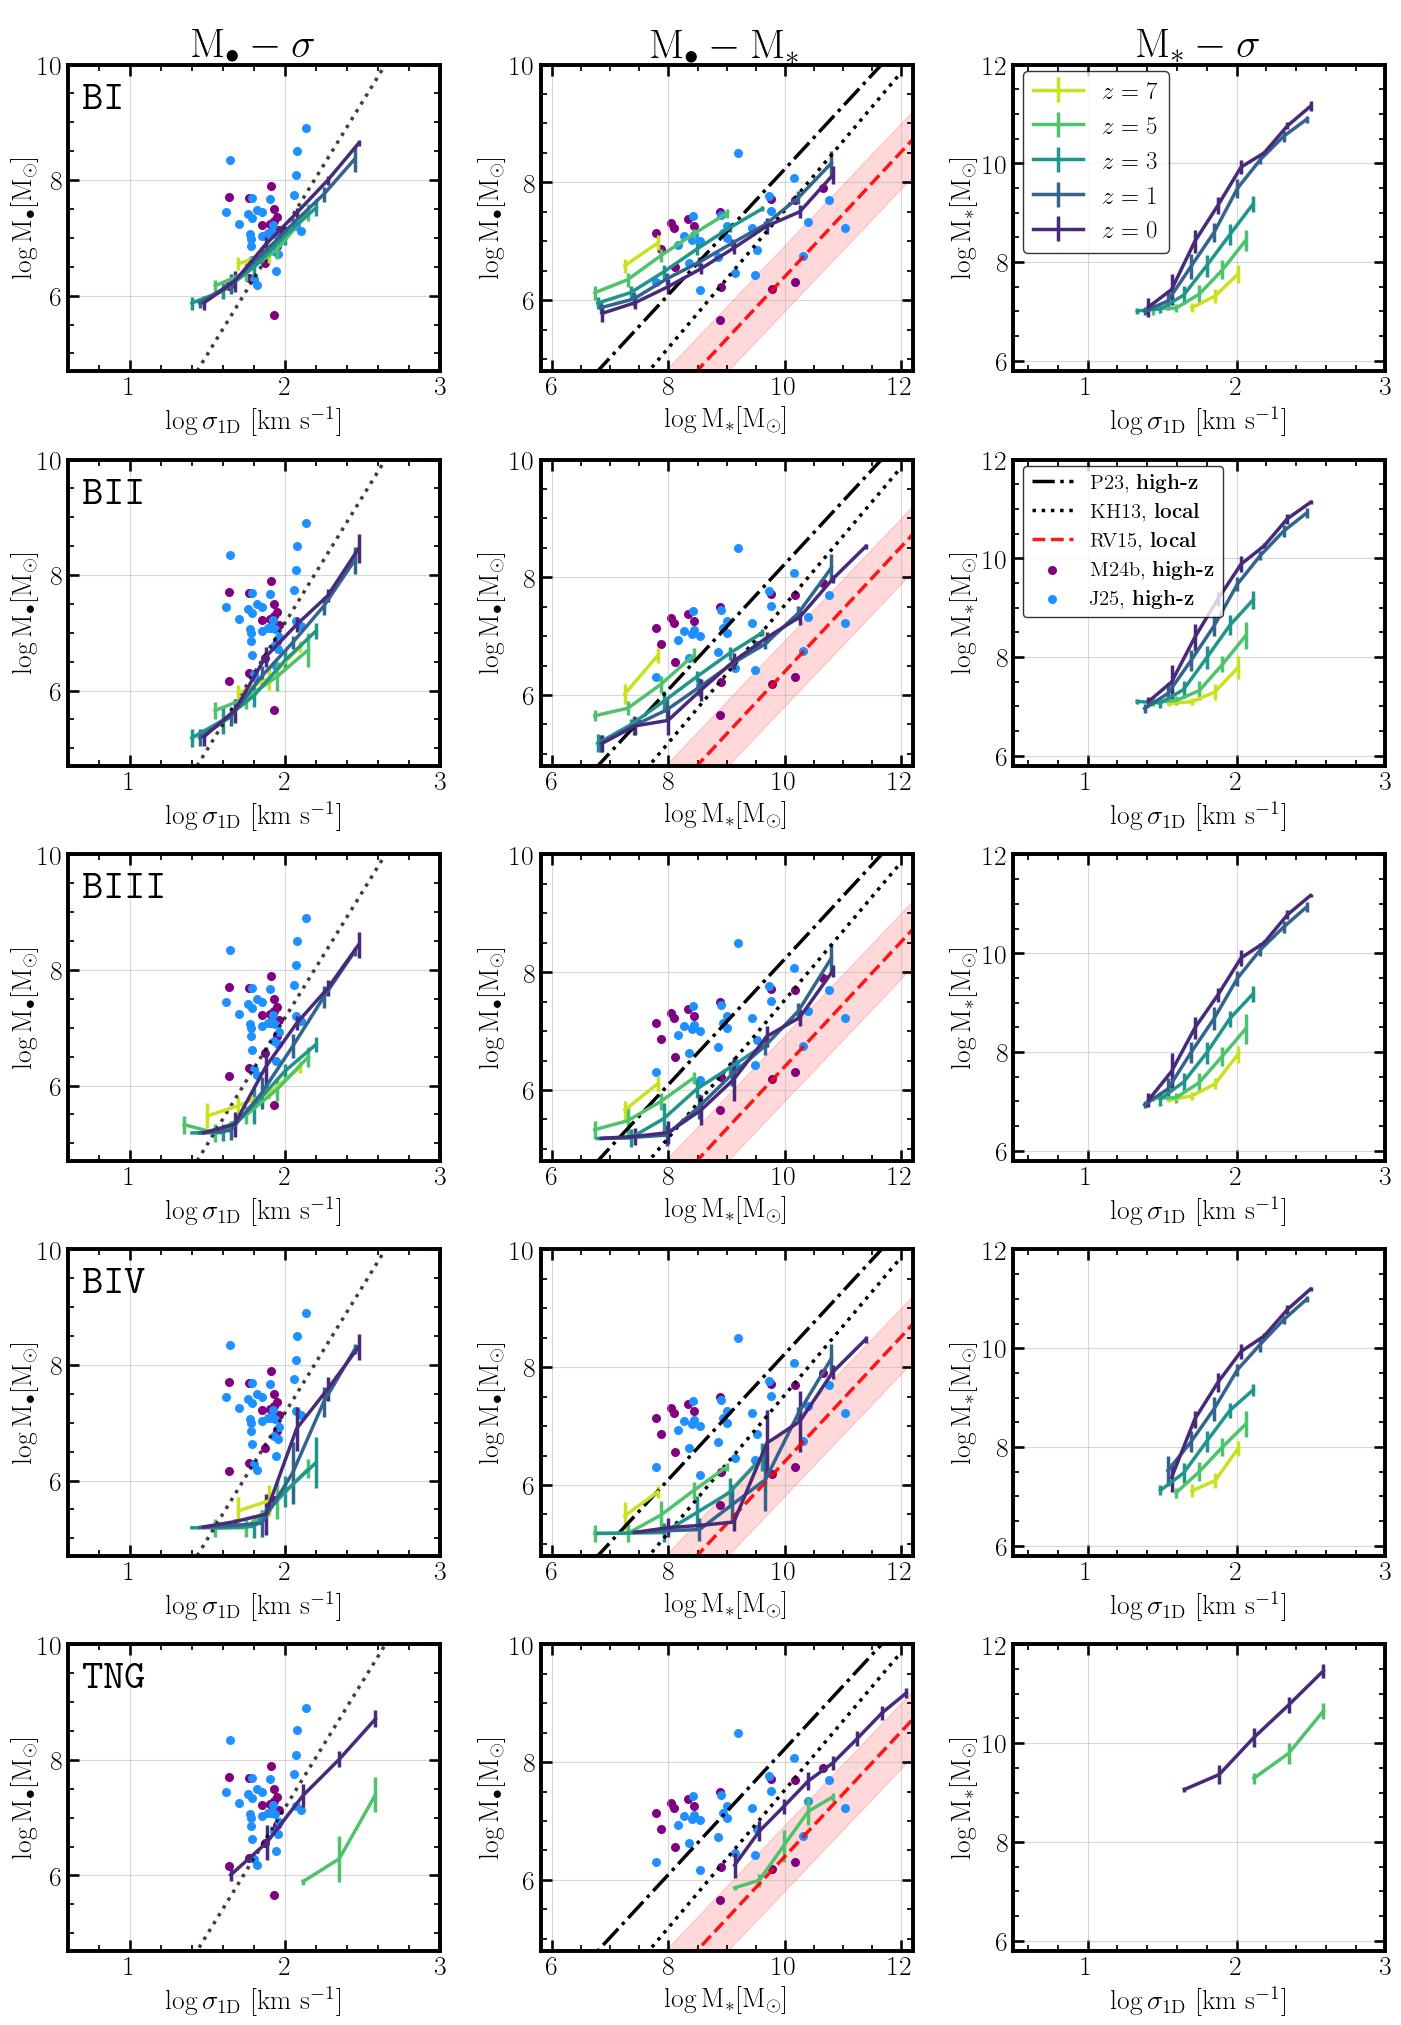

In [23]:
legend_names = ['$z=7$','$z=6$','$z=5$','$z=4$','$z=3$','$z=2$','$z=1$','$z=0$',]
cmap = plt.get_cmap('viridis')
axislabels = [r'$Log_{10}\ \sigma_x [km\ s^{-1}]$',r'$Log_{10}\ M_{*} [M_{\odot}]$ ']
titles=[r'$\texttt{BI}$',r'$\texttt{BII}$',r'$\texttt{BIII}$',r'$\texttt{BIV}$',r'$\texttt{TNG}$']
relations = [r'$\mathrm{M_{\bullet}}-\sigma$',r'$\mathrm{M_{\bullet}-M}_*$',r'$\mathrm{M}_*-\sigma$']
label_font_size=25

fig,axs = plt.subplots(5,3,figsize = (17,23))

plt.subplots_adjust(wspace=0.27, hspace=0.29) 

zs = np.abs(7 - np.array([7,5,3,1,0]))

# Plotting M-sigma: MsigmaMeans, MsigmaStdDevs, MsigmaXpoints

for i in range(4):
    for ii in range(len(zs)): # Only selecting z = 5,3,1,0
        axs[i,0].errorbar(MsigmaXpoints[zs[ii]],MsigmaMeans[i,zs[ii]],yerr = MsigmaIQRs[i,zs[ii]],
                                    label=legend_names[zs[ii]],color = cmap(0.92 - 0.2*ii),lw=2.5) 
    axs[i,0].plot(xfit,KH13_yfit[0],ls='dotted',lw=2.5,alpha=0.75,color='black')
    # axs[i,0].plot(xfit,B21_yfit,ls=(0, (3, 1, 1, 1, 1, 1)),lw=2.5,alpha=0.75,color='black')#, label = 'Bennert et al. 2021')
    axs[i,0].scatter(Maiolino_x,Maiolino_y,color='purple',s=30)#,label='Maiolino et al 2024')
    axs[i,0].scatter(Juodzbalis_et_al_msigma_x,Juodzbalis_et_al_msigma_y,color='dodgerblue',s=30)
    axs[i,0].set_xlim(0.6,3.0)
    axs[i,0].set_ylim(4.7,10)
    axs[i,0].grid(alpha=0.5)
for i in range(5):
    axs[i,0].set_ylabel(r'$\log \mathrm{M_{\bullet} [M_\odot]}$',labelpad=0)
    axs[i,0].set_xlabel(r'$\log \sigma_{\mathrm{1D}}\ [\mathrm{km}\ \mathrm{s}^{-1}]$')

handles, labels = axs[0,0].get_legend_handles_labels()

# Plotting M-Mstar: MMstarMeans, MMstarStdDevs, MMstarXpoints

for i in range(4):
    for ii in range(len(zs)): # Only selecting z = 5,3,1,0
        if i == 0:
            axs[i,1].errorbar(MMstarXpoints[zs[ii]],MMstarMeans[i,zs[ii]],yerr = MMstarIQRs[i,zs[ii]],
                                      label=legend_names[zs[ii]],color = cmap(0.92 - 0.2*ii),lw=2.5)
        else:
            axs[i,1].errorbar(MMstarXpoints[zs[ii]],MMstarMeans[i,zs[ii]],yerr = MMstarIQRs[i,zs[ii]],
                                      color = cmap(0.92 - 0.2*ii),lw=2.5)
    # axs[i,1].plot(0,0,ls=(0, (3, 1, 1, 1, 1, 1)),lw=2.5,alpha=0.75,color='black', label = r'Bennert et al. 2021, $\textbf{local}$')
    axs[i,1].plot(xfit_Pacucchi,Pacucchi_yfit[0],ls='dashdot',lw=2.5,alpha=1,color='black',label=r'P23, $\textbf{high-z}$')
    axs[i,1].plot(xfit_M_Mstar,KH13_M_Mstar_yfit[0],ls='dotted',lw=2.5,alpha=1,color='black',label=r'KH13, $\textbf{local}$')
    axs[i,1].plot(xfit_RV15,RV15_yfit[0],label=r'RV15, $\textbf{local}$',ls='dashed',lw=2.5,alpha=0.9,color='red')
    # axs[i,1].plot(xfit_G20,G20_yfit,color='green',label = r'Greene et al. 2020')
    axs[i,1].fill_between(xfit_RV15up,RV15_yfitup[0],RV15_yfitdown[0],alpha=0.15,color='red')
    axs[i,1].scatter(Maiolino_x_M_Mstar,Maiolino_y_M_Mstar,color='purple',s=30,label=r'M24b, $\textbf{high-z}$')
    axs[i,1].scatter(Juodzbalis_et_al_mmstar_x,Juodzbalis_et_al_mmstar_y,color='dodgerblue',s=30,label = r'J25, $\textbf{high-z}$')
    axs[i,1].set_xlim(5.8,12.2)
    axs[i,1].set_ylim(4.8,10)
    axs[i,1].grid(alpha=0.5)
for i in range(5):
    axs[i,1].set_xlabel(r'$\log \mathrm{M_* [M_\odot]}$')
    axs[i,1].set_ylabel(r'$\log \mathrm{M_{\bullet} [M_\odot]}$')
    
handlesObs, labelsObs = axs[1,1].get_legend_handles_labels()
    
# Plotting Mstar-sigma: MstarsigmaMeans, MstarsigmaStdDevs, MstarsigmaXpoints

for i in range(4):
    for ii in range(len(zs)): # Only selecting z = 5,3,1,0
        axs[i,2].errorbar(MstarsigmaXpoints[zs[ii]],MstarsigmaMeans[i,zs[ii]],yerr = MstarsigmaIQRs[i,zs[ii]],
                                  label=legend_names[zs[ii]],color = cmap(0.92 - 0.2*ii),lw=2.5)
    axs[i,2].set_xlim(0.5,3)
    axs[i,2].set_ylim(5.8,12)
    axs[i,2].grid(alpha=0.5)
for i in range(5):
    axs[i,2].set_xlabel(r'$\log \sigma_{\mathrm{1D}}\ [\mathrm{km}\ \mathrm{s}^{-1}]$')
    axs[i,2].set_ylabel(r'$\log \mathrm{M_* [M_\odot]}$')
    
# Plotting TNG
axs[4,0].errorbar(Msigma_TNG_Xpoints[0],Msigma_TNG_means[0][0],Msigma_TNG_IQRs[0][0],lw=2.5,color = cmap(0.92 - 1*0.2))
axs[4,1].errorbar(MMstar_TNG_Xpoints[0],MMstar_TNG_means[0][0],MMstar_TNG_IQRs[0][0],lw=2.5,color=cmap(0.92 - 1*0.2))
axs[4,2].errorbar(Mstarsigma_TNG_Xpoints[0],Mstarsigma_TNG_means[0][0],Mstarsigma_TNG_IQRs[0][0],lw=2.5,color=cmap(0.92 - 1*0.2))

axs[4,0].errorbar(Msigma_TNG_Xpoints[0],Msigma_TNG_means[0][1],Msigma_TNG_IQRs[0][1],lw=2.5,color=cmap(0.92 - 4*0.2))
axs[4,1].errorbar(MMstar_TNG_Xpoints[0],MMstar_TNG_means[0][1],MMstar_TNG_IQRs[0][1],lw=2.5,color=cmap(0.92 - 4*0.2))
axs[4,2].errorbar(Mstarsigma_TNG_Xpoints[0],Mstarsigma_TNG_means[0][1],Mstarsigma_TNG_IQRs[0][1],lw=2.5,color=cmap(0.92 - 4*0.2))

axs[4,0].plot(xfit,KH13_yfit[0],ls='dotted',lw=2.5,alpha=0.75,color='black')
# axs[4,0].plot(xfit,B21_yfit,ls=(0, (3, 1, 1, 1, 1, 1)),lw=2.5,alpha=0.75,color='black')#, label = 'Bennert et al. 2021')
axs[4,1].plot(xfit_M_Mstar,KH13_M_Mstar_yfit[0],ls='dotted',lw=2.5,alpha=1,color='black')#,label='Kormendy & Ho 2013')
axs[4,1].plot(xfit_Pacucchi,Pacucchi_yfit[0],ls='dashdot',lw=2.5,alpha=1,color='black')#,label='Pacucchi et al. 2023')
axs[4,1].plot(xfit_RV15,RV15_yfit[0],ls='dashed',lw=2.5,alpha=0.9,color='red')
axs[4,1].fill_between(xfit_RV15up,RV15_yfitup[0],RV15_yfitdown[0],alpha=0.15,color='red')

axs[4,0].scatter(Maiolino_x,Maiolino_y,color='purple',s=30)
axs[4,1].scatter(Maiolino_x_M_Mstar,Maiolino_y_M_Mstar,color='purple',s=30,label='Maiolino et al. 2024')
axs[4,0].scatter(Juodzbalis_et_al_msigma_x,Juodzbalis_et_al_msigma_y,color='dodgerblue',s=30)
axs[4,1].scatter(Juodzbalis_et_al_mmstar_x,Juodzbalis_et_al_mmstar_y,color='dodgerblue',s=30,label = r'Juod\u{z}balis et al. 2025')
        
# Setting x and y lims for TNG plots
axs[4,0].set_xlim(0.6,3.0)
axs[4,0].set_ylim(4.7,10)
axs[4,1].set_xlim(5.8,12.2)
axs[4,1].set_ylim(4.8,10)
axs[4,2].set_xlim(0.5,3)
axs[4,2].set_ylim(5.8,12)
    
# Setting columnn titles, other misc. plotting things
for i in range(3):
    axs[0,i].set_title(relations[i],size = label_font_size+5)
    axs[4,i].grid(alpha=0.5)
    
# Setting labels for rows:
for i in range(5):
    axs[i,0].text(0.7,9.25,titles[i],size=label_font_size+5,fontweight='bold')

fig.legend(handles, labels, loc=(0.73,0.875),edgecolor="black",fontsize=18)
fig.legend(handlesObs, labelsObs, loc=(0.73,0.695),edgecolor="black",fontsize=15)
fig.subplots_adjust(top=0.93)

plt.show()
fig.savefig("Plots/Paper_Figs/Mega_plot_final_clean+RV15+z7.pdf", bbox_inches='tight')

# Redshift evolution plots

## M-sigma:

In [24]:
sigmas = [1.5,1.75,2]
bin_width = 0.05

bFOF_sigmas = [Sigma_bulge_bFOFz0,Sigma_bulge_bFOFz1,Sigma_bulge_bFOFz2,Sigma_bulge_bFOFz3,Sigma_bulge_bFOFz4,
               Sigma_bulge_bFOFz5,Sigma_bulge_bFOFz6,Sigma_bulge_bFOFz7]
bFOF_sigmas=[np.log10(i) for i in bFOF_sigmas]
bFOF_masses = [MBH_decomp_bFOFz0,MBH_decomp_bFOFz1,MBH_decomp_bFOFz2,MBH_decomp_bFOFz3,MBH_decomp_bFOFz4,MBH_decomp_bFOFz5,
              MBH_decomp_bFOFz6,MBH_decomp_bFOFz7]
bFOF_masses=[np.log10(i) for i in bFOF_masses]

LW10_sigmas = [Sigma_bulge_LW10z0,Sigma_bulge_LW10z1,Sigma_bulge_LW10z2,Sigma_bulge_LW10z3,Sigma_bulge_LW10z4,
               Sigma_bulge_LW10z5,Sigma_bulge_LW10z6,Sigma_bulge_LW10z7]
LW10_sigmas=[np.log10(i) for i in LW10_sigmas]
LW10_masses = [MBH_decomp_LW10z0,MBH_decomp_LW10z1,MBH_decomp_LW10z2,MBH_decomp_LW10z3,MBH_decomp_LW10z4,MBH_decomp_LW10z5,
              MBH_decomp_LW10z6,MBH_decomp_LW10z7]
LW10_masses=[np.log10(i) for i in LW10_masses]

spin_sigmas = [Sigma_bulge_spinz0,Sigma_bulge_spinz1,Sigma_bulge_spinz2,Sigma_bulge_spinz3,Sigma_bulge_spinz4,
               Sigma_bulge_spinz5,Sigma_bulge_spinz6,Sigma_bulge_spinz7]
spin_sigmas=[np.log10(i) for i in spin_sigmas]
spin_masses = [MBH_decomp_spinz0,MBH_decomp_spinz1,MBH_decomp_spinz2,MBH_decomp_spinz3,MBH_decomp_spinz4,MBH_decomp_spinz5,
              MBH_decomp_spinz6,MBH_decomp_spinz7]
spin_masses=[np.log10(i) for i in spin_masses]

rich_sigmas = [Sigma_bulge_richz0,Sigma_bulge_richz1,Sigma_bulge_richz2,Sigma_bulge_richz3,Sigma_bulge_richz4,
               Sigma_bulge_richz5,Sigma_bulge_richz6,Sigma_bulge_richz7]
rich_sigmas=[np.log10(i) for i in rich_sigmas]
rich_masses = [MBH_decomp_richz0,MBH_decomp_richz1,MBH_decomp_richz2,MBH_decomp_richz3,MBH_decomp_richz4,MBH_decomp_richz5,
              MBH_decomp_richz6,MBH_decomp_richz7]
rich_masses=[np.log10(i) for i in rich_masses]

msigma_bFOFavgs,msigma_bFOFiqrs,msigma_bFOF_cints = fixed_x(bFOF_sigmas,bFOF_masses,sigmas,bin_width)
msigma_LW10avgs,msigma_LW10iqrs,msigma_LW10_cints = fixed_x(LW10_sigmas,LW10_masses,sigmas,bin_width)
msigma_spinavgs,msigma_spiniqrs,msigma_spin_cints = fixed_x(spin_sigmas,spin_masses,sigmas,bin_width)
msigma_richavgs,msigma_richiqrs,msigma_rich_cints = fixed_x(rich_sigmas,rich_masses,sigmas,bin_width)

/tmp/ipykernel_588965/137281469.py:6: RuntimeWarning: divide by zero encountered in log10
  bFOF_sigmas=[np.log10(i) for i in bFOF_sigmas]
/tmp/ipykernel_588965/137281469.py:13: RuntimeWarning: divide by zero encountered in log10
  LW10_sigmas=[np.log10(i) for i in LW10_sigmas]
/tmp/ipykernel_588965/137281469.py:20: RuntimeWarning: divide by zero encountered in log10
  spin_sigmas=[np.log10(i) for i in spin_sigmas]
/tmp/ipykernel_588965/137281469.py:27: RuntimeWarning: divide by zero encountered in log10
  rich_sigmas=[np.log10(i) for i in rich_sigmas]


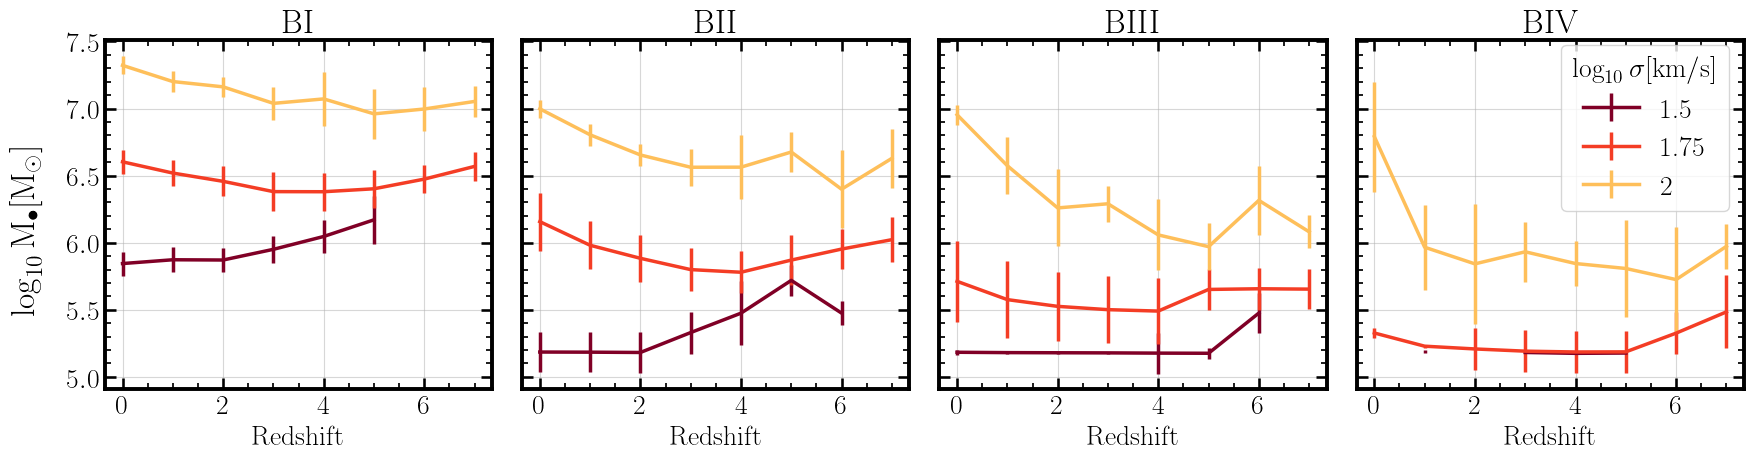

In [25]:
redshifts=[0,1,2,3,4,5,6,7]
titles = ['BI','BII','BIII','BIV']
cmap = plt.get_cmap('YlOrRd')

fig,axs = plt.subplots(1,4,figsize = (18,5),sharey=True) # figsize = (20,6)

for i in range(len(sigmas)):
    if i == 0:
        axs[0].errorbar(redshifts,msigma_bFOFavgs[i],msigma_bFOFiqrs[i],color = cmap(1 - i*(1/3)),lw=2.5,label = '1.5')
        axs[1].errorbar(redshifts,msigma_LW10avgs[i],msigma_LW10iqrs[i],color = cmap(1 - i*(1/3)),lw=2.5)
        axs[2].errorbar(redshifts,msigma_spinavgs[i],msigma_spiniqrs[i],color = cmap(1 - i*(1/3)),lw=2.5)
        axs[3].errorbar(redshifts,msigma_richavgs[i],msigma_richiqrs[i],color = cmap(1 - i*(1/3)),lw=2.5)
    elif i == 1:
        axs[0].errorbar(redshifts,msigma_bFOFavgs[i],msigma_bFOFiqrs[i],color = cmap(1 - i*(1/3)),lw=2.5,label = '1.75')
        axs[1].errorbar(redshifts,msigma_LW10avgs[i],msigma_LW10iqrs[i],color = cmap(1 - i*(1/3)),lw=2.5)
        axs[2].errorbar(redshifts,msigma_spinavgs[i],msigma_spiniqrs[i],color = cmap(1 - i*(1/3)),lw=2.5)
        axs[3].errorbar(redshifts,msigma_richavgs[i],msigma_richiqrs[i],color = cmap(1 - i*(1/3)),lw=2.5)
    elif i == 2:
        axs[0].errorbar(redshifts,msigma_bFOFavgs[i],msigma_bFOFiqrs[i],color = cmap(1 - i*(1/3)),lw=2.5,label = '2')
        axs[1].errorbar(redshifts,msigma_LW10avgs[i],msigma_LW10iqrs[i],color = cmap(1 - i*(1/3)),lw=2.5)
        axs[2].errorbar(redshifts,msigma_spinavgs[i],msigma_spiniqrs[i],color = cmap(1 - i*(1/3)),lw=2.5)
        axs[3].errorbar(redshifts,msigma_richavgs[i],msigma_richiqrs[i],color = cmap(1 - i*(1/3)),lw=2.5)
    
for i in range(len(axs)):
    ax = axs[i]
    ax.set_title(titles[i])
    ax.grid(alpha=0.5)
    ax.set_xlabel('Redshift')
    
fig.supylabel(r'$\mathrm{\log_{10} M_{\bullet} [M_\odot]}$')
fig.legend(title = r'$\log_{10} \sigma [\mathrm{km/s}]$',loc = (0.89,0.54),fontsize=20)

fig.tight_layout()

fig.savefig('Plots/M_Sigma_fixed_sigma.pdf')

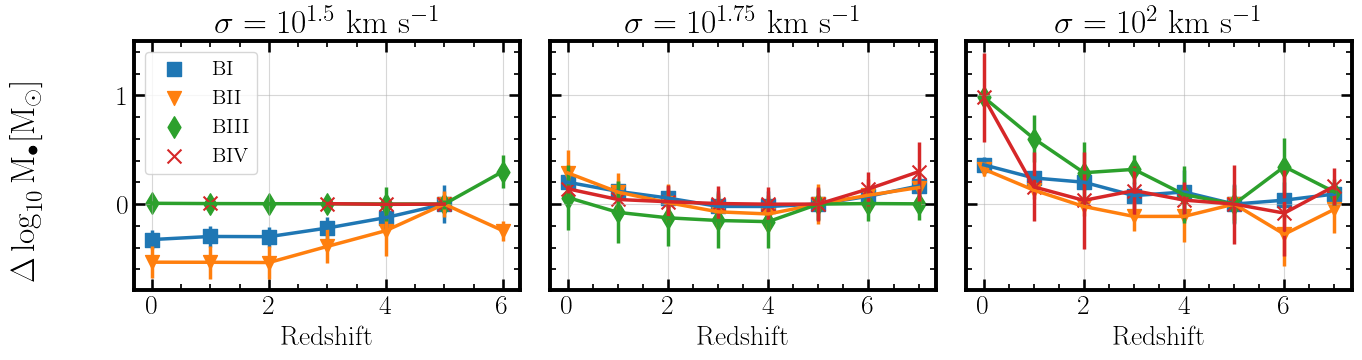

In [26]:
redshifts=np.arange(0,8)
colors = ['#1f77b4','#ff7f0e','#2ca02c','#d62728']
markers = ["s","v","d","x"]
sizes = [100,100,120,100]
titles = [r'$\sigma = 10^{1.5}\ \mathrm{km\ s^{-1}}$',r'$\sigma = 10^{1.75}\ \mathrm{km\ s^{-1}}$',r'$\sigma = 10^{2}\ \mathrm{km\ s^{-1}}$']

fig,axs = plt.subplots(1,3,figsize = (14,4),sharey=True)

for i in range(len(sigmas)):
    axs[i].errorbar(redshifts,np.array(msigma_bFOFavgs[i]) - msigma_bFOFavgs[i][5],msigma_bFOFiqrs[i],color = colors[0],lw=2.5)
    axs[i].errorbar(redshifts,np.array(msigma_LW10avgs[i]) - msigma_LW10avgs[i][5],msigma_LW10iqrs[i],color = colors[1],lw=2.5)
    axs[i].errorbar(redshifts,np.array(msigma_spinavgs[i]) - msigma_spinavgs[i][5],msigma_spiniqrs[i],color = colors[2],lw=2.5)
    axs[i].errorbar(redshifts,np.array(msigma_richavgs[i]) - msigma_richavgs[i][5],msigma_richiqrs[i],color = colors[3],lw=2.5)

    axs[i].scatter(redshifts,np.array(msigma_bFOFavgs[i]) - msigma_bFOFavgs[i][5],color = colors[0],marker = markers[0],label = 'BI',s=sizes[0])
    axs[i].scatter(redshifts,np.array(msigma_LW10avgs[i]) - msigma_LW10avgs[i][5],color = colors[1],marker = markers[1],label = 'BII',s=sizes[1])
    axs[i].scatter(redshifts,np.array(msigma_spinavgs[i]) - msigma_spinavgs[i][5],color = colors[2],marker = markers[2],label = 'BIII',s=sizes[2])
    axs[i].scatter(redshifts,np.array(msigma_richavgs[i]) - msigma_richavgs[i][5],color = colors[3],marker = markers[3],label = 'BIV',s=sizes[3])
    
for i in range(len(axs)):
    ax = axs[i]
    ax.set_title(titles[i])
    ax.grid(alpha=0.5)
    ax.set_xlabel('Redshift')
    
fig.supylabel(r'$\mathrm{\Delta \log_{10} M_{\bullet} [M_\odot]}$')
axs[0].legend(loc=2,fontsize=15)
fig.tight_layout()

fig.savefig('Plots/Paper_Figs/M_Sigma_fixed_sigma_t.pdf')

## M-Mstar

This figure was not included in the paper, but is useful for showing the redshift evolution in BH mass at fixed stellar mass

In [27]:
Mstars = [7,8,9]
bin_width = 0.2

bFOF_mstars = [Mstar_decomp_bFOFz0,Mstar_decomp_bFOFz1,Mstar_decomp_bFOFz2,Mstar_decomp_bFOFz3,Mstar_decomp_bFOFz4,
               Mstar_decomp_bFOFz5,Mstar_decomp_bFOFz6,Mstar_decomp_bFOFz7]
bFOF_mstars=[np.log10(i) for i in bFOF_mstars]
bFOF_masses = [MBH_decomp_bFOFz0,MBH_decomp_bFOFz1,MBH_decomp_bFOFz2,MBH_decomp_bFOFz3,MBH_decomp_bFOFz4,MBH_decomp_bFOFz5,
              MBH_decomp_bFOFz6,MBH_decomp_bFOFz7]
bFOF_masses=[np.log10(i) for i in bFOF_masses]

LW10_mstars = [Mstar_decomp_LW10z0,Mstar_decomp_LW10z1,Mstar_decomp_LW10z2,Mstar_decomp_LW10z3,Mstar_decomp_LW10z4,
              Mstar_decomp_LW10z5,Mstar_decomp_LW10z6,Mstar_decomp_LW10z7]
LW10_mstars=[np.log10(i) for i in LW10_mstars]
LW10_masses = [MBH_decomp_LW10z0,MBH_decomp_LW10z1,MBH_decomp_LW10z2,MBH_decomp_LW10z3,MBH_decomp_LW10z4,MBH_decomp_LW10z5,
              MBH_decomp_LW10z6,MBH_decomp_LW10z7]
LW10_masses=[np.log10(i) for i in LW10_masses]

spin_mstars = [Mstar_decomp_spinz0,Mstar_decomp_spinz1,Mstar_decomp_spinz2,Mstar_decomp_spinz3,Mstar_decomp_spinz4,
              Mstar_decomp_spinz5,Mstar_decomp_spinz6,Mstar_decomp_spinz7]
spin_mstars=[np.log10(i) for i in spin_mstars]
spin_masses = [MBH_decomp_spinz0,MBH_decomp_spinz1,MBH_decomp_spinz2,MBH_decomp_spinz3,MBH_decomp_spinz4,MBH_decomp_spinz5,
              MBH_decomp_spinz6,MBH_decomp_spinz7]
spin_masses=[np.log10(i) for i in spin_masses]

rich_mstars = [Mstar_decomp_richz0,Mstar_decomp_richz1,Mstar_decomp_richz2,Mstar_decomp_richz3,Mstar_decomp_richz4,
              Mstar_decomp_richz5,Mstar_decomp_richz6,Mstar_decomp_richz7]
rich_mstars=[np.log10(i) for i in rich_mstars]
rich_masses = [MBH_decomp_richz0,MBH_decomp_richz1,MBH_decomp_richz2,MBH_decomp_richz3,MBH_decomp_richz4,MBH_decomp_richz5,
              MBH_decomp_richz6,MBH_decomp_richz7]
rich_masses=[np.log10(i) for i in rich_masses]

mmstar_bFOFavgs,mmstar_bFOFiqrs,mmstar_bFOF_cints = fixed_x(bFOF_mstars,bFOF_masses,Mstars,bin_width)
mmstar_LW10avgs,mmstar_LW10iqrs,mmstar_LW10_cints = fixed_x(LW10_mstars,LW10_masses,Mstars,bin_width)
mmstar_spinavgs,mmstar_spiniqrs,mmstar_spin_cints = fixed_x(spin_mstars,spin_masses,Mstars,bin_width)
mmstar_richavgs,mmstar_richiqrs,mmstar_rich_cints = fixed_x(rich_mstars,rich_masses,Mstars,bin_width)

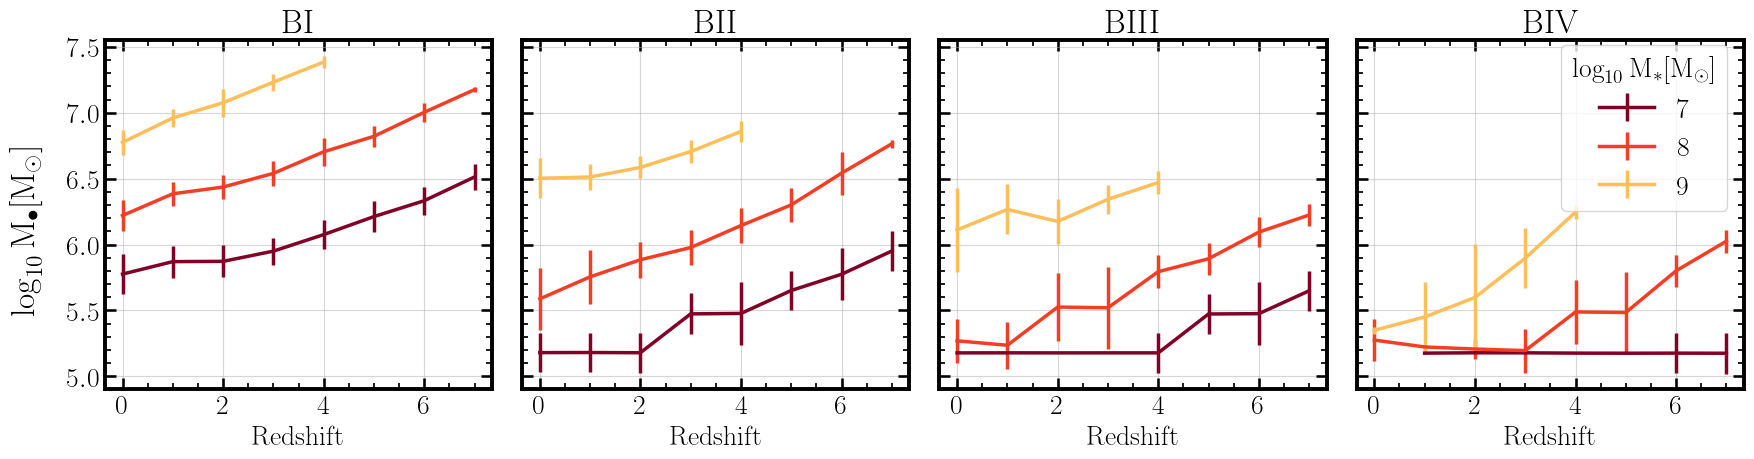

In [28]:
redshifts=np.arange(0,8,1)
titles = ['BI','BII','BIII','BIV']
cmap = plt.get_cmap('YlOrRd')

fig,axs = plt.subplots(1,4,figsize = (18,5),sharey=True)

for i in range(len(Mstars)):
    if i == 0:
        axs[0].errorbar(redshifts,mmstar_bFOFavgs[i],mmstar_bFOFiqrs[i],color = cmap(1 - i*(1/3)),lw=2.5,label = '7')
        axs[1].errorbar(redshifts,mmstar_LW10avgs[i],mmstar_LW10iqrs[i],color = cmap(1 - i*(1/3)),lw=2.5)
        axs[2].errorbar(redshifts,mmstar_spinavgs[i],mmstar_spiniqrs[i],color = cmap(1 - i*(1/3)),lw=2.5)
        axs[3].errorbar(redshifts,mmstar_richavgs[i],mmstar_richiqrs[i],color = cmap(1 - i*(1/3)),lw=2.5)
    elif i == 1:
        axs[0].errorbar(redshifts,mmstar_bFOFavgs[i],mmstar_bFOFiqrs[i],color = cmap(1 - i*(1/3)),lw=2.5,label = '8')
        axs[1].errorbar(redshifts,mmstar_LW10avgs[i],mmstar_LW10iqrs[i],color = cmap(1 - i*(1/3)),lw=2.5)
        axs[2].errorbar(redshifts,mmstar_spinavgs[i],mmstar_spiniqrs[i],color = cmap(1 - i*(1/3)),lw=2.5)
        axs[3].errorbar(redshifts,mmstar_richavgs[i],mmstar_richiqrs[i],color = cmap(1 - i*(1/3)),lw=2.5)
    elif i == 2:
        axs[0].errorbar(redshifts,mmstar_bFOFavgs[i],mmstar_bFOFiqrs[i],color = cmap(1 - i*(1/3)),lw=2.5,label = '9')
        axs[1].errorbar(redshifts,mmstar_LW10avgs[i],mmstar_LW10iqrs[i],color = cmap(1 - i*(1/3)),lw=2.5)
        axs[2].errorbar(redshifts,mmstar_spinavgs[i],mmstar_spiniqrs[i],color = cmap(1 - i*(1/3)),lw=2.5)
        axs[3].errorbar(redshifts,mmstar_richavgs[i],mmstar_richiqrs[i],color = cmap(1 - i*(1/3)),lw=2.5)
    
for i in range(len(axs)):
    ax = axs[i]
    ax.set_title(titles[i])
    ax.grid(alpha=0.5)
    ax.set_xlabel('Redshift')
    
fig.supylabel(r'$\mathrm{\log_{10} M_{\bullet} [M_\odot]}$')
fig.legend(title = r'$\mathrm{\log_{10} M_* [M_\odot]}$',loc = (0.89,0.54),fontsize=20)

fig.tight_layout()

fig.savefig('Plots/M_Mstar_fixed_Mstar.pdf')

## M-Mstar slope:

In [29]:
bFOF_mstars = [Mstar_decomp_bFOFz0,Mstar_decomp_bFOFz1,Mstar_decomp_bFOFz2,Mstar_decomp_bFOFz3,Mstar_decomp_bFOFz4,
               Mstar_decomp_bFOFz5,Mstar_decomp_bFOFz6,Mstar_decomp_bFOFz7]
LW10_mstars = [Mstar_decomp_LW10z0,Mstar_decomp_LW10z1,Mstar_decomp_LW10z2,Mstar_decomp_LW10z3,Mstar_decomp_LW10z4,
              Mstar_decomp_LW10z5,Mstar_decomp_LW10z6,Mstar_decomp_LW10z7]
spin_mstars = [Mstar_decomp_spinz0,Mstar_decomp_spinz1,Mstar_decomp_spinz2,Mstar_decomp_spinz3,Mstar_decomp_spinz4,
              Mstar_decomp_spinz5,Mstar_decomp_spinz6,Mstar_decomp_spinz7]
rich_mstars = [Mstar_decomp_richz0,Mstar_decomp_richz1,Mstar_decomp_richz2,Mstar_decomp_richz3,Mstar_decomp_richz4,
              Mstar_decomp_richz5,Mstar_decomp_richz6,Mstar_decomp_richz7]

bFOF_masses = [MBH_decomp_bFOFz0,MBH_decomp_bFOFz1,MBH_decomp_bFOFz2,MBH_decomp_bFOFz3,MBH_decomp_bFOFz4,MBH_decomp_bFOFz5,
              MBH_decomp_bFOFz6,MBH_decomp_bFOFz7]
LW10_masses = [MBH_decomp_LW10z0,MBH_decomp_LW10z1,MBH_decomp_LW10z2,MBH_decomp_LW10z3,MBH_decomp_LW10z4,MBH_decomp_LW10z5,
              MBH_decomp_LW10z6,MBH_decomp_LW10z7]
spin_masses = [MBH_decomp_spinz0,MBH_decomp_spinz1,MBH_decomp_spinz2,MBH_decomp_spinz3,MBH_decomp_spinz4,MBH_decomp_spinz5,
              MBH_decomp_spinz6,MBH_decomp_spinz7]
rich_masses = [MBH_decomp_richz0,MBH_decomp_richz1,MBH_decomp_richz2,MBH_decomp_richz3,MBH_decomp_richz4,MBH_decomp_richz5,
              MBH_decomp_richz6,MBH_decomp_richz7]

# List of mstars
Prop1list=[bFOF_mstars,LW10_mstars,spin_mstars,rich_mstars]

# List of BH Masses
Prop2list=[bFOF_masses,LW10_masses,spin_masses,rich_masses]

redshifts=np.arange(8)

In [30]:
All_slopes = []
All_cints = []

for i in range(len(Prop1list)):

    Box_Slopes = []
    Box_cints = []
    
    for ii in range(len(redshifts)):

        xdata = np.log10(Prop1list[i][ii])
        ydata = np.log10(Prop2list[i][ii])

        mass_mask = ydata > np.log10(5*1.5e5) # At least 5 times seed mass
        xdata=xdata[mass_mask]
        ydata=ydata[mass_mask]
        
        slope = calc_slope(xdata,ydata)

        # Bootstrapping our slope calculation
        n_bootstrap = 10000
        n = len(xdata)
        bootstrap_indices = np.random.randint(0, n, size=(n_bootstrap, n))

        slope_samples = np.array([calc_slope(xdata[idx], ydata[idx]) for idx in bootstrap_indices])
        slope_samples = slope_samples[~np.isnan(slope_samples)]
        # print("Length of slope samples:",len(slope_samples))
        
        # Confidence interval
        ci_lower = np.percentile(slope_samples, 2.5)
        ci_upper = np.percentile(slope_samples, 97.5)

        # Adjusted to tell plt.errorbar where to place errors
        c_int = (slope-ci_lower,ci_upper-slope)
        
        Box_Slopes.append(slope)
        Box_cints.append(c_int)

    All_slopes.append(Box_Slopes)
    All_cints.append(Box_cints)

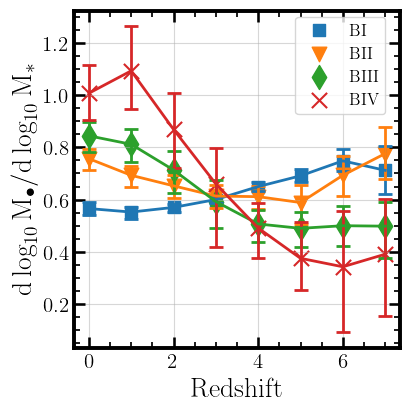

In [31]:
redshifts=[0,1,2,3,4,5,6,7]
titles = ['BI','BII','BIII','BIV']
markers = ["s","v","d","x"]
sizes = [75,110,150,120]
colors = ['#1f77b4','#ff7f0e','#2ca02c','#d62728']

fig,ax = plt.subplots(1,1,figsize = (4.5,4.5),sharey=True)


for i in range(len(titles)):
    ax.scatter(redshifts,All_slopes[i],color=colors[i],s=sizes[i],label = titles[i],marker = markers[i])
    ax.errorbar(redshifts,All_slopes[i],(np.array(All_cints[i])[:,0],np.array(All_cints[i])[:,1]),color=colors[i],lw=2,capsize=5,capthick=2)


ax.grid(alpha=0.5)
# ax.set_title(r'$\mathrm{M_{BH}-M_*}$ slope redshift evolution',size=23)
ax.set_ylabel(r'$\mathrm{d\log_{10} M_{\bullet}/d\log_{10}M_*}$',size=20)
ax.set_xlabel('Redshift',size=20)
ax.tick_params(axis='both', which='major', labelsize=15)

fig.legend(fontsize=12,loc=(0.72,0.72))

fig.tight_layout()
fig.savefig('Plots/Paper_Figs/M_Mstar_slope_massmasked.pdf',bbox_inches='tight')

## Mstar-sigma:

In [32]:
sigmas = [1.5,1.75,2]
bin_width = 0.05

bFOF_sigmas = [Sigma_bulge_bFOFz0,Sigma_bulge_bFOFz1,Sigma_bulge_bFOFz2,Sigma_bulge_bFOFz3,Sigma_bulge_bFOFz4,
               Sigma_bulge_bFOFz5,Sigma_bulge_bFOFz6,Sigma_bulge_bFOFz7]
bFOF_sigmas=[np.log10(i) for i in bFOF_sigmas]
bFOF_mstars = [Mstar_decomp_bFOFz0,Mstar_decomp_bFOFz1,Mstar_decomp_bFOFz2,Mstar_decomp_bFOFz3,Mstar_decomp_bFOFz4,
               Mstar_decomp_bFOFz5,Mstar_decomp_bFOFz6,Mstar_decomp_bFOFz7]
bFOF_mstars=[np.log10(i) for i in bFOF_mstars]

LW10_sigmas = [Sigma_bulge_LW10z0,Sigma_bulge_LW10z1,Sigma_bulge_LW10z2,Sigma_bulge_LW10z3,Sigma_bulge_LW10z4,
               Sigma_bulge_LW10z5,Sigma_bulge_LW10z6,Sigma_bulge_LW10z7]
LW10_sigmas=[np.log10(i) for i in LW10_sigmas]
LW10_mstars = [Mstar_decomp_LW10z0,Mstar_decomp_LW10z1,Mstar_decomp_LW10z2,Mstar_decomp_LW10z3,Mstar_decomp_LW10z4,
              Mstar_decomp_LW10z5,Mstar_decomp_LW10z6,Mstar_decomp_LW10z7]
LW10_mstars=[np.log10(i) for i in LW10_mstars]

spin_sigmas = [Sigma_bulge_spinz0,Sigma_bulge_spinz1,Sigma_bulge_spinz2,Sigma_bulge_spinz3,Sigma_bulge_spinz4,
               Sigma_bulge_spinz5,Sigma_bulge_spinz6,Sigma_bulge_spinz7]
spin_sigmas=[np.log10(i) for i in spin_sigmas]
spin_mstars = [Mstar_decomp_spinz0,Mstar_decomp_spinz1,Mstar_decomp_spinz2,Mstar_decomp_spinz3,Mstar_decomp_spinz4,
              Mstar_decomp_spinz5,Mstar_decomp_spinz6,Mstar_decomp_spinz7]
spin_mstars=[np.log10(i) for i in spin_mstars]

rich_sigmas = [Sigma_bulge_richz0,Sigma_bulge_richz1,Sigma_bulge_richz2,Sigma_bulge_richz3,Sigma_bulge_richz4,
               Sigma_bulge_richz5,Sigma_bulge_richz6,Sigma_bulge_richz7]
rich_sigmas=[np.log10(i) for i in rich_sigmas]
rich_mstars = [Mstar_decomp_richz0,Mstar_decomp_richz1,Mstar_decomp_richz2,Mstar_decomp_richz3,Mstar_decomp_richz4,
              Mstar_decomp_richz5,Mstar_decomp_richz6,Mstar_decomp_richz7]
rich_mstars=[np.log10(i) for i in rich_mstars]

mstarsigma_bFOFavgs,mstarsigma_bFOFiqrs,mstarsigma_bFOF_cints = fixed_x(bFOF_sigmas,bFOF_mstars,sigmas,bin_width)
mstarsigma_LW10avgs,mstarsigma_LW10iqrs,mstarsigma_LW10_cints = fixed_x(LW10_sigmas,LW10_mstars,sigmas,bin_width)
mstarsigma_spinavgs,mstarsigma_spiniqrs,mstarsigma_spin_cints = fixed_x(spin_sigmas,spin_mstars,sigmas,bin_width)
mstarsigma_richavgs,mstarsigma_richiqrs,mstarsigma_rich_cints = fixed_x(rich_sigmas,rich_mstars,sigmas,bin_width)

/tmp/ipykernel_588965/3475443081.py:6: RuntimeWarning: divide by zero encountered in log10
  bFOF_sigmas=[np.log10(i) for i in bFOF_sigmas]
/tmp/ipykernel_588965/3475443081.py:13: RuntimeWarning: divide by zero encountered in log10
  LW10_sigmas=[np.log10(i) for i in LW10_sigmas]
/tmp/ipykernel_588965/3475443081.py:20: RuntimeWarning: divide by zero encountered in log10
  spin_sigmas=[np.log10(i) for i in spin_sigmas]
/tmp/ipykernel_588965/3475443081.py:27: RuntimeWarning: divide by zero encountered in log10
  rich_sigmas=[np.log10(i) for i in rich_sigmas]


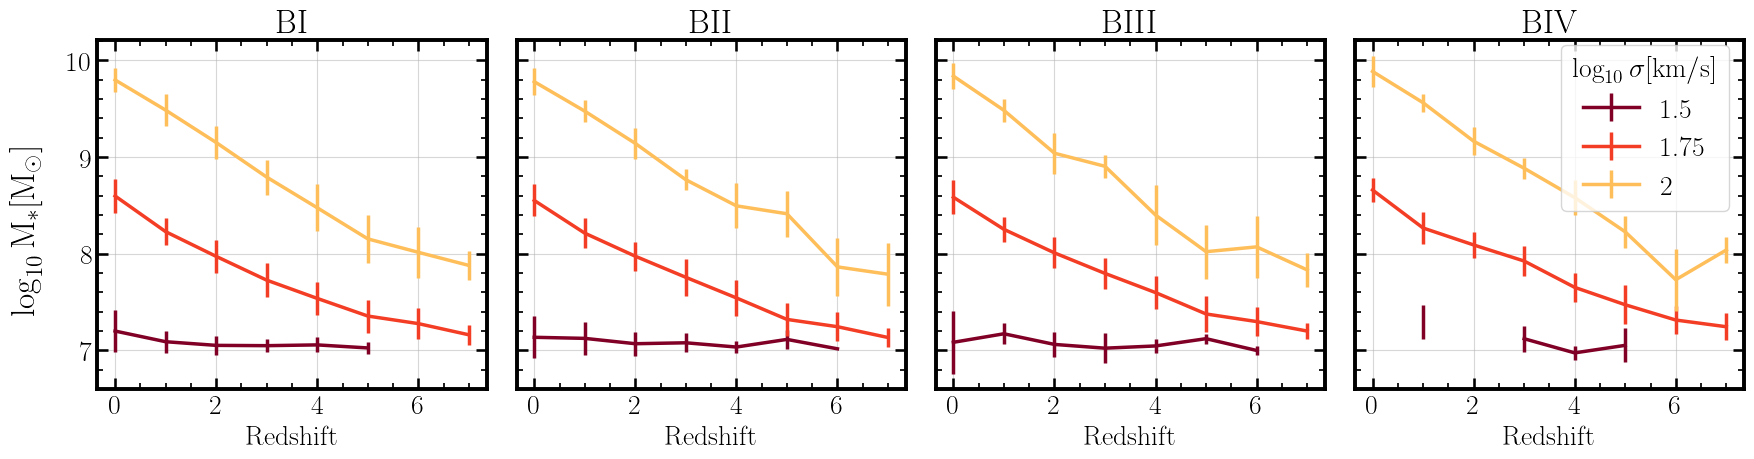

In [33]:
redshifts=[0,1,2,3,4,5,6,7]
titles = ['BI','BII','BIII','BIV']
cmap = plt.get_cmap('YlOrRd')
sigmas = [1.5,1.75,2]

fig,axs = plt.subplots(1,4,figsize = (18,5),sharey=True)

for i in range(len(sigmas)):
    if i == 0:
        axs[0].errorbar(redshifts,mstarsigma_bFOFavgs[i],mstarsigma_bFOFiqrs[i],color = cmap(1 - i*(1/3)),lw=2.5,label = '1.5')
        axs[1].errorbar(redshifts,mstarsigma_LW10avgs[i],mstarsigma_LW10iqrs[i],color = cmap(1 - i*(1/3)),lw=2.5)
        axs[2].errorbar(redshifts,mstarsigma_spinavgs[i],mstarsigma_spiniqrs[i],color = cmap(1 - i*(1/3)),lw=2.5)
        axs[3].errorbar(redshifts,mstarsigma_richavgs[i],mstarsigma_richiqrs[i],color = cmap(1 - i*(1/3)),lw=2.5)
    elif i == 1:
        axs[0].errorbar(redshifts,mstarsigma_bFOFavgs[i],mstarsigma_bFOFiqrs[i],color = cmap(1 - i*(1/3)),lw=2.5,label = '1.75')
        axs[1].errorbar(redshifts,mstarsigma_LW10avgs[i],mstarsigma_LW10iqrs[i],color = cmap(1 - i*(1/3)),lw=2.5)
        axs[2].errorbar(redshifts,mstarsigma_spinavgs[i],mstarsigma_spiniqrs[i],color = cmap(1 - i*(1/3)),lw=2.5)
        axs[3].errorbar(redshifts,mstarsigma_richavgs[i],mstarsigma_richiqrs[i],color = cmap(1 - i*(1/3)),lw=2.5)
    elif i == 2:
        axs[0].errorbar(redshifts,mstarsigma_bFOFavgs[i],mstarsigma_bFOFiqrs[i],color = cmap(1 - i*(1/3)),lw=2.5,label = '2')
        axs[1].errorbar(redshifts,mstarsigma_LW10avgs[i],mstarsigma_LW10iqrs[i],color = cmap(1 - i*(1/3)),lw=2.5)
        axs[2].errorbar(redshifts,mstarsigma_spinavgs[i],mstarsigma_spiniqrs[i],color = cmap(1 - i*(1/3)),lw=2.5)
        axs[3].errorbar(redshifts,mstarsigma_richavgs[i],mstarsigma_richiqrs[i],color = cmap(1 - i*(1/3)),lw=2.5)
    
for i in range(len(axs)):
    ax = axs[i]
    ax.set_title(titles[i])
    ax.grid(alpha=0.5)
    ax.set_xlabel('Redshift')
    
fig.supylabel(r'$\mathrm{\log_{10} M_{*} [M_\odot]}$')
# fig.suptitle(r'$\mathrm{M_*}$ redshift evolution at fixed $\sigma$',size=35)
fig.legend(title = r'$\mathrm{\log_{10} \sigma [km/s]}$',loc = (0.89,0.54),fontsize=20)

fig.tight_layout()

fig.savefig('Plots/Mstar_sigma_fixed_sigma.pdf', bbox_inches='tight')

Making a reduced version with just SM5 and SM5_LW10_spin_rich, since the trend is the same in all four plots

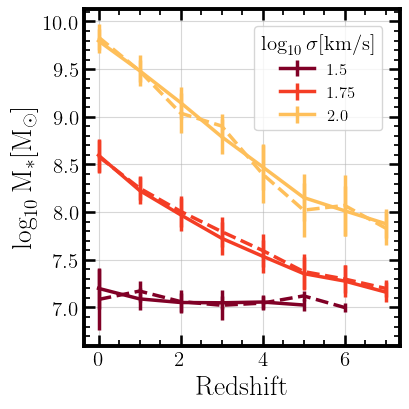

In [34]:
fig,ax = plt.subplots(1,1,figsize=(4.5,4.5))
cmap = plt.get_cmap('YlOrRd')
sigmas = [1.5,1.75,2]
redshifts = np.arange(0,8)

labels = ['1.5','1.75','2.0']

for i in range(len(sigmas)):
    ax.errorbar(redshifts,mstarsigma_bFOFavgs[i],mstarsigma_bFOFiqrs[i],color = cmap(1 - i*(1/3)),lw=2.5,label = labels[i])
    ax.errorbar(redshifts,mstarsigma_spinavgs[i],mstarsigma_spiniqrs[i],color = cmap(1 - i*(1/3)),lw=2.5,ls='--')

ax.set_ylabel(r'$\mathrm{\log_{10} M_{*} [M_\odot]}$')
ax.set_xlabel('Redshift')
# ax.set_title(r'$\mathrm{M_*}$ redshift evolution at fixed $\sigma$',size=23)
ax.grid(alpha=0.5)
ax.tick_params(axis='both', which='major', labelsize=15)

fig.legend(title = r'$\mathrm{\log_{10} \sigma [km/s]}$',loc = (0.62,0.68),prop={'size': 12},title_fontsize=15)
fig.tight_layout()

fig.savefig('Plots/SM5_spin_Mstar_sigma_fixed_sigma.pdf', bbox_inches='tight')

Now calculating finite difference slopes

In [35]:
sigmas = [bFOF_sigmas,LW10_sigmas,spin_sigmas,rich_sigmas]
mstars = [bFOF_mstars,LW10_mstars,spin_mstars,rich_mstars]
const_sigmas = [1.5,1.75,2]
bin_width = 0.05

# Bootstrap parameters
n_resamples = 10000
rng = np.random.default_rng(42)

dmstar_dzs = []

for n in range(len(mstars)):

    n_samples = [len(mstars[n][i]) for i in range(len(mstars[n]))]
    
    # Perform bootstrap
    dmstar_dz_box = []
    
    for _ in range(n_resamples):
        
        resample_indices = [rng.integers(n, n_samples[i], n_samples[i]) for i in range(len(n_samples))]
        resample_sigmas = [sigmas[n][i][resample_indices[i]] for i in range(len(resample_indices))]
        resample_mstars = [mstars[n][i][resample_indices[i]] for i in range(len(resample_indices))]

        dmstar_dz = calc_finite_diff(resample_mstars,resample_sigmas,const_sigmas,bin_width)
        
        dmstar_dz_box.append(dmstar_dz)

    dmstar_dzs.append(dmstar_dz_box)

dmstar_dzs = np.array(dmstar_dzs)

In [36]:
dmstar_dz_sigma_bFOF = calc_finite_diff(mstars[0],sigmas[0],const_sigmas,bin_width)
dmstar_dz_sigma_LW10 = calc_finite_diff(mstars[1],sigmas[1],const_sigmas,bin_width)
dmstar_dz_sigma_spin = calc_finite_diff(mstars[2],sigmas[2],const_sigmas,bin_width)
dmstar_dz_sigma_rich = calc_finite_diff(mstars[3],sigmas[3],const_sigmas,bin_width)

dmstar_dz_sigma_all = np.array([dmstar_dz_sigma_bFOF,dmstar_dz_sigma_LW10,dmstar_dz_sigma_spin,dmstar_dz_sigma_rich])

alpha = 0.05
lowers_dmstar_dzs = []
uppers_dmstar_dzs = []

for i in range(len(sigmas)):

    lowers_i_dmstar_dzs = []
    uppers_i_dmstar_dzs = []
    
    for ii in range(len(const_sigmas)):

        lowers_ii_dmstar_dzs = []
        uppers_ii_dmstar_dzs = []
    
        for iii in range(dmstar_dzs.shape[-1]):
        
            if len(dmstar_dzs[i,:,ii,iii][~np.isnan(dmstar_dzs[i,:,ii,iii])]) == 0:
                lowers_ii_dmstar_dzs.append(np.nan)
                uppers_ii_dmstar_dzs.append(np.nan)
            else:
                lower_dmstar_dzs = np.abs(dmstar_dz_sigma_all[i,ii,iii] - np.array([np.percentile(dmstar_dzs[i,:,ii,iii][~np.isnan(dmstar_dzs[i,:,ii,iii])],
                                                                                     100 * (alpha / 2))]))
                upper_dmstar_dzs = np.abs(dmstar_dz_sigma_all[i,ii,iii] - np.array([np.percentile(dmstar_dzs[i,:,ii,iii][~np.isnan(dmstar_dzs[i,:,ii,iii])],
                                                                                     100 * (1 - alpha / 2))]))
                lowers_ii_dmstar_dzs.append(lower_dmstar_dzs[0])
                uppers_ii_dmstar_dzs.append(upper_dmstar_dzs[0])
    
        lowers_i_dmstar_dzs.append(lowers_ii_dmstar_dzs)
        uppers_i_dmstar_dzs.append(uppers_ii_dmstar_dzs)

    lowers_dmstar_dzs.append(lowers_i_dmstar_dzs)
    uppers_dmstar_dzs.append(uppers_i_dmstar_dzs)

lowers_dmstar_dzs = np.array(lowers_dmstar_dzs)
uppers_dmstar_dzs = np.array(uppers_dmstar_dzs)

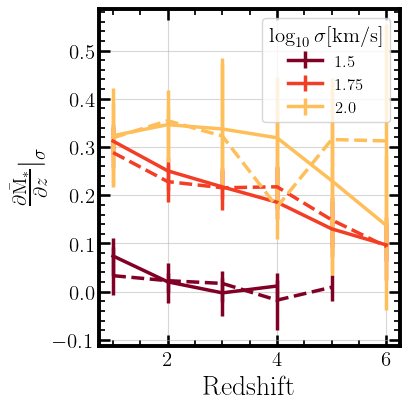

In [37]:
fig,ax = plt.subplots(1,1,figsize=(4.5,4.5))
cmap = plt.get_cmap('YlOrRd')
sigmas = [1.5,1.75,2]
redshifts = np.arange(1,7)

labels = ['1.5','1.75','2.0']

for i in range(len(sigmas)):
    ax.errorbar(redshifts,dmstar_dz_sigma_all[0][i],[lowers_dmstar_dzs[0][i],uppers_dmstar_dzs[0][i]],color = cmap(1 - i*(1/3)),lw=2.5,label = labels[i])
    ax.errorbar(redshifts,dmstar_dz_sigma_all[1][i],[lowers_dmstar_dzs[1][i],uppers_dmstar_dzs[1][i]],color = cmap(1 - i*(1/3)),lw=2.5,ls='--')

ax.set_ylabel(r'$\frac{\partial \mathrm{\bar{M}}_*}{\partial z}\big|_\sigma$')
ax.set_xlabel('Redshift')
# ax.set_title(r'$\mathrm{M_*}$ redshift evolution at fixed $\sigma$',size=23)
ax.grid(alpha=0.5)
ax.tick_params(axis='both', which='major', labelsize=15)

fig.legend(title = r'$\mathrm{\log_{10} \sigma [km/s]}$',loc = (0.64,0.7),prop={'size': 12},title_fontsize=15)
fig.tight_layout()

fig.savefig('Plots/SM5_spin_Mstar_sigma_redshift_slope.pdf', bbox_inches='tight')

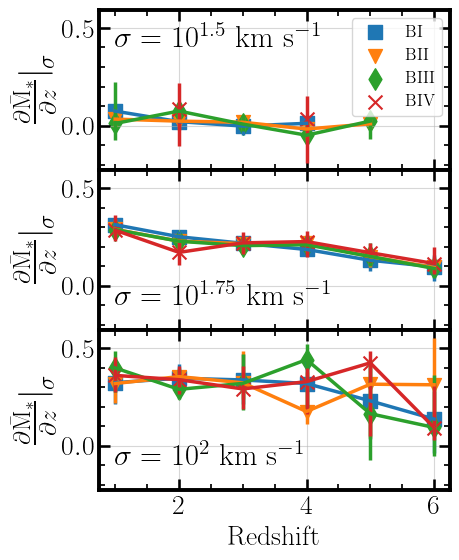

In [38]:
# Making transposed version of the above plot with multiple subplots for differne sigmas to keep same color scheme

fig,axs = plt.subplots(3,1,figsize=(5,6),sharex=True,sharey=True)
sigmas = [1.5,1.75,2]
redshifts = np.arange(1,7)
colors = ['#1f77b4','#ff7f0e','#2ca02c','#d62728']
markers = ["s","v","d","x"]
sizes = [100,100,120,100]
titles = [r'$\sigma = 10^{1.5}\ \mathrm{km\ s^{-1}}$',r'$\sigma = 10^{1.75}\ \mathrm{km\ s^{-1}}$',r'$\sigma = 10^{2}\ \mathrm{km\ s^{-1}}$']

for i in range(len(sigmas)):
    axs[i].errorbar(redshifts,dmstar_dz_sigma_all[0][i],[lowers_dmstar_dzs[0][i],uppers_dmstar_dzs[0][i]],color = colors[0],lw=2.5)
    axs[i].errorbar(redshifts,dmstar_dz_sigma_all[1][i],[lowers_dmstar_dzs[1][i],uppers_dmstar_dzs[1][i]],color = colors[1],lw=2.5)
    axs[i].errorbar(redshifts,dmstar_dz_sigma_all[2][i],[lowers_dmstar_dzs[2][i],uppers_dmstar_dzs[2][i]],color = colors[2],lw=2.5)
    axs[i].errorbar(redshifts,dmstar_dz_sigma_all[3][i],[lowers_dmstar_dzs[3][i],uppers_dmstar_dzs[3][i]],color = colors[3],lw=2.5)

    axs[i].scatter(redshifts,dmstar_dz_sigma_all[0][i],color = colors[0],s=sizes[0],label = 'BI',marker = markers[0])
    axs[i].scatter(redshifts,dmstar_dz_sigma_all[1][i],color = colors[1],s=sizes[1],label = 'BII',marker = markers[1])
    axs[i].scatter(redshifts,dmstar_dz_sigma_all[2][i],color = colors[2],s=sizes[2],label = 'BIII',marker = markers[2])
    axs[i].scatter(redshifts,dmstar_dz_sigma_all[3][i],color = colors[3],s=sizes[3],label = 'BIV',marker = markers[3])
    
    axs[i].grid(alpha=0.5)
    axs[i].set_ylabel(r'$\frac{\partial \mathrm{\bar{M}}_*}{\partial z}\big|_\sigma$',size=25)

# ax.set_title(r'$\mathrm{M_*}$ redshift evolution at fixed $\sigma$',size=23)
axs[2].set_xlabel('Redshift')
axs[0].text(1,0.4,titles[0],size=22)
axs[1].text(1,-0.1,titles[1],size=22)
axs[2].text(1,-0.1,titles[2],size=22)


# fig.legend(title = r'$\mathrm{\log_{10} \sigma [km/s]}$',loc = (0.64,0.7),prop={'size': 12},title_fontsize=15)
axs[0].legend(fontsize=12,loc=1)
fig.tight_layout()
fig.subplots_adjust(hspace=0)

fig.savefig('Plots/Paper_Figs/SM5_spin_Mstar_sigma_redshift_slope_t.pdf', bbox_inches='tight')

## HMR 

In [39]:
HMR_bFOF_z0 = np.array(bFOF_decomp_z0[10])
HMR_bFOF_z1 = np.array(bFOF_decomp_z1[10])
HMR_bFOF_z2 = np.array(bFOF_decomp_z2[10])
HMR_bFOF_z3 = np.array(bFOF_decomp_z3[10])
HMR_bFOF_z4 = np.array(bFOF_decomp_z4[10])
HMR_bFOF_z5 = np.array(bFOF_decomp_z5[10])
HMR_bFOF_z6 = np.array(bFOF_decomp_z6[10])
HMR_bFOF_z7 = np.array(bFOF_decomp_z7[10])

HMR_spin_z0 = np.array(spin_decomp_z0[10])
HMR_spin_z1 = np.array(spin_decomp_z1[10])
HMR_spin_z2 = np.array(spin_decomp_z2[10])
HMR_spin_z3 = np.array(spin_decomp_z3[10])
HMR_spin_z4 = np.array(spin_decomp_z4[10])
HMR_spin_z5 = np.array(spin_decomp_z5[10])
HMR_spin_z6 = np.array(spin_decomp_z6[10])
HMR_spin_z7 = np.array(spin_decomp_z7[10])

In [40]:
mstars = [7,8,9]
bin_width = 0.1

bFOF_mstars = [np.log10(Mstar_decomp_bFOFz0),np.log10(Mstar_decomp_bFOFz1),np.log10(Mstar_decomp_bFOFz2),np.log10(Mstar_decomp_bFOFz3),
                np.log10(Mstar_decomp_bFOFz4),np.log10(Mstar_decomp_bFOFz5),np.log10(Mstar_decomp_bFOFz6),np.log10(Mstar_decomp_bFOFz7)]
bFOF_HMRs = [HMR_bFOF_z0,HMR_bFOF_z1,HMR_bFOF_z2,HMR_bFOF_z3,HMR_bFOF_z4,HMR_bFOF_z5,HMR_bFOF_z6,HMR_bFOF_z7]
spin_mstars = [np.log10(Mstar_decomp_spinz0),np.log10(Mstar_decomp_spinz1),np.log10(Mstar_decomp_spinz2),np.log10(Mstar_decomp_spinz3),
                np.log10(Mstar_decomp_spinz4),np.log10(Mstar_decomp_spinz5),np.log10(Mstar_decomp_spinz6),np.log10(Mstar_decomp_spinz7)]
spin_HMRs = [HMR_spin_z0,HMR_spin_z1,HMR_spin_z2,HMR_spin_z3,HMR_spin_z4,HMR_spin_z5,HMR_spin_z6,HMR_spin_z7]

HMR_bFOF_avgs,HMR_bFOF_iqrs,HMR_bFOF_cint = fixed_x(bFOF_mstars,bFOF_HMRs,mstars,bin_width)
HMR_spin_avgs,HMR_spin_iqrs,HMR_spin_cint = fixed_x(bFOF_mstars,bFOF_HMRs,mstars,bin_width)

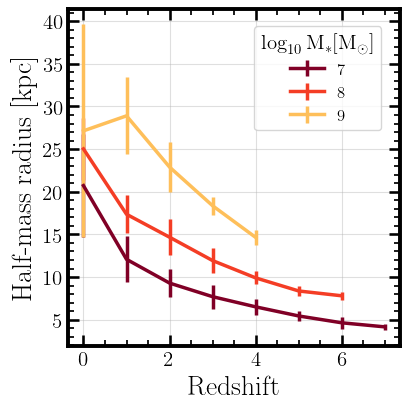

In [41]:
redshifts=[0,1,2,3,4,5,6,7]
labels = [7,8,9]
cmap = plt.get_cmap('YlOrRd')

fig,ax = plt.subplots(1,1,figsize = (4.5,4.5))

for i in range(3):
    ax.errorbar(redshifts,HMR_bFOF_avgs[i],HMR_bFOF_iqrs[i],label=labels[i],color = cmap(1 - i*(1/3)),lw=2.5)
    # ax.errorbar(redshifts,HMR_spin_avgs[i],HMR_spin_iqrs[i],color = cmap(1 - i*(1/3)),lw=2.5,ls='--')
 
fig.legend(title=r'$\mathrm{\log_{10} M_* [M_\odot]}$',loc = (0.62,0.68),prop={'size': 12},title_fontsize=15)
ax.set_ylabel(r'Half-mass radius [kpc]')
ax.set_xlabel(r'Redshift')
# ax.set_title(r'HMR redshift evolution at fixed $\sigma$',size=23)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.grid(alpha=0.4)
fig.tight_layout()

fig.savefig('Plots/Paper_Figs/SM5_HMR_redshift_evol.pdf',bbox_inches='tight')

## Scatter vs redshift

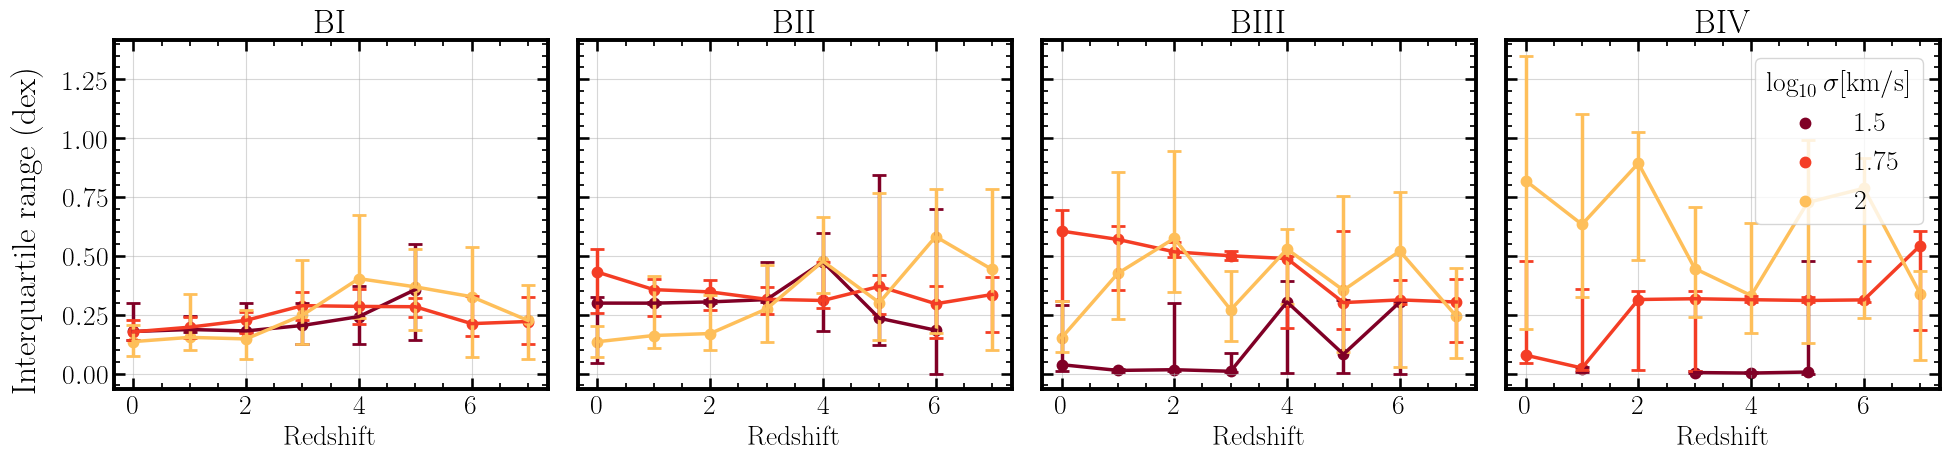

In [42]:
redshifts=np.arange(0,8)
titles = ['BI','BII','BIII','BIV']
cmap = plt.get_cmap('YlOrRd')

fig,axs = plt.subplots(1,4,figsize = (20,5),sharey=True)

for i in range(len(sigmas)):
    if i == 0:
        axs[0].scatter(redshifts,2*np.array(msigma_bFOFiqrs[i]),color = cmap(1 - i*(1/3)),lw=2.5,label = '1.5')
        axs[1].scatter(redshifts,2*np.array(msigma_LW10iqrs[i]),color = cmap(1 - i*(1/3)),lw=2.5)
        axs[2].scatter(redshifts,2*np.array(msigma_spiniqrs[i]),color = cmap(1 - i*(1/3)),lw=2.5)
        axs[3].scatter(redshifts,2*np.array(msigma_richiqrs[i]),color = cmap(1 - i*(1/3)),lw=2.5)
        axs[0].errorbar(redshifts,2*np.array(msigma_bFOFiqrs[i]),[np.array(msigma_bFOF_cints[i])[:,0],np.array(msigma_bFOF_cints[i])[:,1]],
                        color = cmap(1 - i*(1/3)),lw=2.5,capsize=5,capthick=2)        
        axs[1].errorbar(redshifts,2*np.array(msigma_LW10iqrs[i]),[np.array(msigma_LW10_cints[i])[:,0],np.array(msigma_LW10_cints[i])[:,1]],
                        color = cmap(1 - i*(1/3)),lw=2.5,capsize=5,capthick=2)   
        axs[2].errorbar(redshifts,2*np.array(msigma_spiniqrs[i]),[np.array(msigma_spin_cints[i])[:,0],np.array(msigma_spin_cints[i])[:,1]],
                        color = cmap(1 - i*(1/3)),lw=2.5,capsize=5,capthick=2)   
        axs[3].errorbar(redshifts,2*np.array(msigma_richiqrs[i]),[np.array(msigma_rich_cints[i])[:,0],np.array(msigma_rich_cints[i])[:,1]],
                        color = cmap(1 - i*(1/3)),lw=2.5,capsize=5,capthick=2)   
    elif i == 1:
        axs[0].scatter(redshifts,2*np.array(msigma_bFOFiqrs[i]),color = cmap(1 - i*(1/3)),lw=2.5,label = '1.75')
        axs[1].scatter(redshifts,2*np.array(msigma_LW10iqrs[i]),color = cmap(1 - i*(1/3)),lw=2.5)
        axs[2].scatter(redshifts,2*np.array(msigma_spiniqrs[i]),color = cmap(1 - i*(1/3)),lw=2.5)
        axs[3].scatter(redshifts,2*np.array(msigma_richiqrs[i]),color = cmap(1 - i*(1/3)),lw=2.5)
        axs[0].errorbar(redshifts,2*np.array(msigma_bFOFiqrs[i]),[np.array(msigma_bFOF_cints[i])[:,0],np.array(msigma_bFOF_cints[i])[:,1]],
                        color = cmap(1 - i*(1/3)),lw=2.5,capsize=5,capthick=2)        
        axs[1].errorbar(redshifts,2*np.array(msigma_LW10iqrs[i]),[np.array(msigma_LW10_cints[i])[:,0],np.array(msigma_LW10_cints[i])[:,1]],
                        color = cmap(1 - i*(1/3)),lw=2.5,capsize=5,capthick=2)   
        axs[2].errorbar(redshifts,2*np.array(msigma_spiniqrs[i]),[np.array(msigma_spin_cints[i])[:,0],np.array(msigma_spin_cints[i])[:,1]],
                        color = cmap(1 - i*(1/3)),lw=2.5,capsize=5,capthick=2)   
        axs[3].errorbar(redshifts,2*np.array(msigma_richiqrs[i]),[np.array(msigma_rich_cints[i])[:,0],np.array(msigma_rich_cints[i])[:,1]],
                        color = cmap(1 - i*(1/3)),lw=2.5,capsize=5,capthick=2)  
    elif i == 2:
        axs[0].scatter(redshifts,2*np.array(msigma_bFOFiqrs[i]),color = cmap(1 - i*(1/3)),lw=2.5,label = '2')
        axs[1].scatter(redshifts,2*np.array(msigma_LW10iqrs[i]),color = cmap(1 - i*(1/3)),lw=2.5)
        axs[2].scatter(redshifts,2*np.array(msigma_spiniqrs[i]),color = cmap(1 - i*(1/3)),lw=2.5)
        axs[3].scatter(redshifts,2*np.array(msigma_richiqrs[i]),color = cmap(1 - i*(1/3)),lw=2.5)
        axs[0].errorbar(redshifts,2*np.array(msigma_bFOFiqrs[i]),[np.array(msigma_bFOF_cints[i])[:,0],np.array(msigma_bFOF_cints[i])[:,1]],
                        color = cmap(1 - i*(1/3)),lw=2.5,capsize=5,capthick=2)        
        axs[1].errorbar(redshifts,2*np.array(msigma_LW10iqrs[i]),[np.array(msigma_LW10_cints[i])[:,0],np.array(msigma_LW10_cints[i])[:,1]],
                        color = cmap(1 - i*(1/3)),lw=2.5,capsize=5,capthick=2)   
        axs[2].errorbar(redshifts,2*np.array(msigma_spiniqrs[i]),[np.array(msigma_spin_cints[i])[:,0],np.array(msigma_spin_cints[i])[:,1]],
                        color = cmap(1 - i*(1/3)),lw=2.5,capsize=5,capthick=2)   
        axs[3].errorbar(redshifts,2*np.array(msigma_richiqrs[i]),[np.array(msigma_rich_cints[i])[:,0],np.array(msigma_rich_cints[i])[:,1]],
                        color = cmap(1 - i*(1/3)),lw=2.5,capsize=5,capthick=2)  
    
for i in range(len(axs)):
    ax = axs[i]
    ax.set_title(titles[i])
    ax.grid(alpha=0.5)
    ax.set_xlabel('Redshift')
    
fig.supylabel(r'Interquartile range (dex)')
# fig.suptitle(r'$\mathrm{M_{BH}}$ interquartile range redshift evolution at fixed $\sigma$',size=35)
fig.legend(title = r'$\log_{10} \sigma [\mathrm{km/s}]$',loc = (0.9,0.51),fontsize=20)

fig.tight_layout()

fig.savefig('Plots/M_Sigma_iqr_errors.pdf')

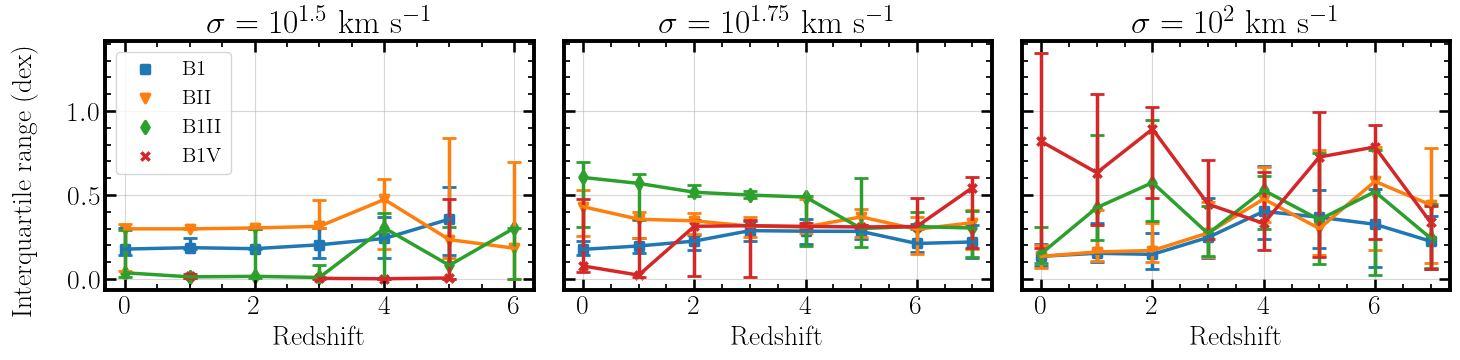

In [43]:
redshifts=np.arange(0,8)
cmap = plt.get_cmap('YlOrRd')
colors = ['#1f77b4','#ff7f0e','#2ca02c','#d62728']
markers = ["s","v","d","x"]
sizes = [100,100,120,100]
titles = [r'$\sigma = 10^{1.5}\ \mathrm{km\ s^{-1}}$',r'$\sigma = 10^{1.75}\ \mathrm{km\ s^{-1}}$',r'$\sigma = 10^{2}\ \mathrm{km\ s^{-1}}$']

fig,axs = plt.subplots(1,3,figsize = (15,4),sharey=True)

for i in range(len(sigmas)):
    axs[i].scatter(redshifts,2*np.array(msigma_bFOFiqrs[i]),color = colors[0],lw=2.5,marker = markers[0],label = 'B1')
    axs[i].scatter(redshifts,2*np.array(msigma_LW10iqrs[i]),color = colors[1],lw=2.5,marker = markers[1],label = 'BII')
    axs[i].scatter(redshifts,2*np.array(msigma_spiniqrs[i]),color = colors[2],lw=2.5,marker = markers[2],label = 'B1II')
    axs[i].scatter(redshifts,2*np.array(msigma_richiqrs[i]),color = colors[3],lw=2.5,marker = markers[3],label = 'B1V')
    
    axs[i].errorbar(redshifts,2*np.array(msigma_bFOFiqrs[i]),[np.array(msigma_bFOF_cints[i])[:,0],np.array(msigma_bFOF_cints[i])[:,1]],
                    color = colors[0],lw=2.5,capsize=5,capthick=2)        
    axs[i].errorbar(redshifts,2*np.array(msigma_LW10iqrs[i]),[np.array(msigma_LW10_cints[i])[:,0],np.array(msigma_LW10_cints[i])[:,1]],
                    color = colors[1],lw=2.5,capsize=5,capthick=2)   
    axs[i].errorbar(redshifts,2*np.array(msigma_spiniqrs[i]),[np.array(msigma_spin_cints[i])[:,0],np.array(msigma_spin_cints[i])[:,1]],
                    color = colors[2],lw=2.5,capsize=5,capthick=2)   
    axs[i].errorbar(redshifts,2*np.array(msigma_richiqrs[i]),[np.array(msigma_rich_cints[i])[:,0],np.array(msigma_rich_cints[i])[:,1]],
                    color = colors[3],lw=2.5,capsize=5,capthick=2)   

    
for i in range(len(axs)):
    ax = axs[i]
    ax.set_title(titles[i])
    ax.grid(alpha=0.5)
    ax.set_xlabel('Redshift')
    
fig.supylabel(r'Interquartile range (dex)',size=20)
axs[0].legend(fontsize=15)
fig.tight_layout()

fig.savefig('Plots/Paper_Figs/M_Sigma_iqr_errors_t.pdf')

# $\mathrm{M}_\bullet-\sigma$ comparison 

In [44]:
# List of sigmas
Prop1list=[[Sigma_bulge_bFOFz5,Sigma_bulge_bFOFz0],[Sigma_bulge_LW10z5,Sigma_bulge_LW10z0],
           [Sigma_bulge_spinz5,Sigma_bulge_spinz0],[Sigma_bulge_richz5,Sigma_bulge_richz0]]

# List of BH Masses
Prop2list=[[MBH_decomp_bFOFz5,MBH_decomp_bFOFz0],[MBH_decomp_LW10z5,MBH_decomp_LW10z0],
           [MBH_decomp_spinz5,MBH_decomp_spinz0],[MBH_decomp_richz5,MBH_decomp_richz0]]

# Limits for making plot in log space
limits=[1.2,2.6]
redshifts=[5,0]

AllBoxMedians,AllBoxIQRs,Xpoints = median_trends(Prop1list,Prop2list,redshifts,limits,bins=10)

/sfs/gpfs/tardis/home/yja6qa/arepo_package/brahma_analysis_clean.py:73: RuntimeWarning: divide by zero encountered in log10
  ids = np.where(np.logical_and(np.log10(Prop1list[i][ii])>=bins[iii],
/sfs/gpfs/tardis/home/yja6qa/arepo_package/brahma_analysis_clean.py:74: RuntimeWarning: divide by zero encountered in log10
  np.log10(Prop1list[i][ii])<=bins[iii+1]))[0]


In [45]:
# Binning as above for Illustris and Illustris TNG
IllProp1 = [[TNG_z5_sigmas,TNG_z0_sigmas]]
IllProp2 = [[TNG_z5_BHs,TNG_z0_BHs]]

redshiftIll = [5,0]

Ill_TNG_medians,Ill_TNG_IQRs,ILL_TNG_Xpoints = median_trends(IllProp1,IllProp2,redshiftIll,limits,bins=10)

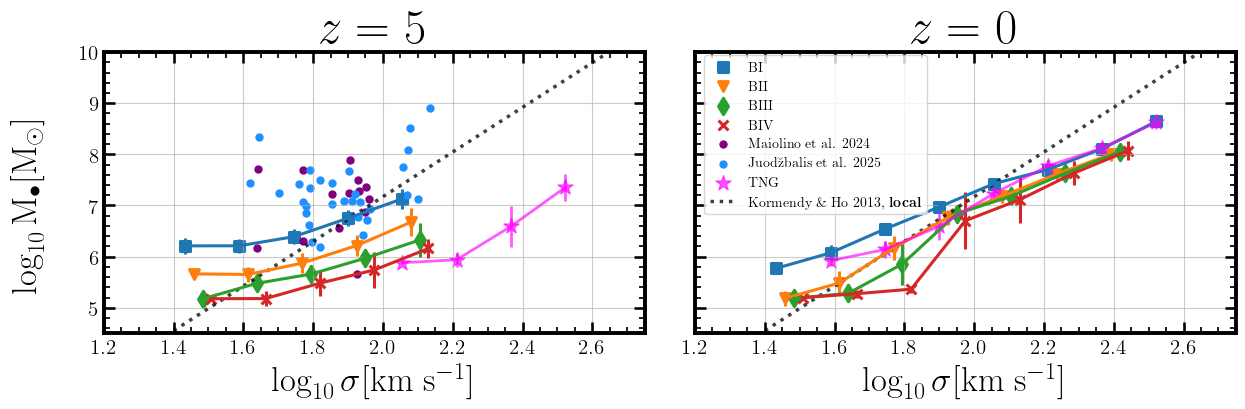

In [46]:
redshifts=[5,0]
legend_names = ['BI','BII','BIII','BIV']
markers = ["s","v","d","x"]
sizes = [50,50,70,50]
axislabels = [r'$\mathrm{\log_{10}\sigma [km\ s^{-1}]}$',r'$\mathrm{\log_{10}M_{\bullet} [M_{\odot}]}$']
tick_size=15
label_font_size=25
colors = ['#1f77b4','#ff7f0e','#2ca02c','#d62728']

f,axes = plt.subplots(1,2,figsize=(13,4.5),sharey=True,sharex=True)

for i in range(AllBoxMedians.shape[0]):
        for ii in range(len(redshifts)):
            
            if ii == 0:
                axes[ii].errorbar(Xpoints[i],AllBoxMedians[i,ii,:],yerr = AllBoxIQRs[i,ii,:],color = colors[i],lw=2.2)
                axes[ii].scatter(Xpoints[i],AllBoxMedians[i,ii,:],color = colors[i],lw=2.2,marker = markers[i],s=sizes[i],
                                  label=legend_names[i])
            else:
                axes[ii].errorbar(Xpoints[i],AllBoxMedians[i,ii,:],yerr = AllBoxIQRs[i,ii,:],
                                  color = colors[i],lw=2.2)
                axes[ii].scatter(Xpoints[i],AllBoxMedians[i,ii,:],color = colors[i],lw=2.2,marker = markers[i],s=sizes[i])

# Index for labeling figure titles
n=0

for ax in axes.flat:
    ax.set_xlim(1.2,2.75)
    ax.set_ylim(4.5,10)
    ax.grid(alpha = 0.65)
    ax.tick_params(labelsize=tick_size)
    ax.set_title(f'$z = {redshifts[n]}$',size = label_font_size+10)
    ax.set_xlabel(f'{axislabels[0]}',fontsize=label_font_size,y=0.06)
    n+=1
    
    if ax==axes.flat[0]:
        ax.scatter(ILL_TNG_Xpoints[0],Ill_TNG_medians[0][0],color='magenta',alpha=0.65,marker = '*',s=130)
        ax.plot(xfit,KH13_yfit[0],ls='dotted',lw=2.5,alpha=0.75,color='black')
        ax.errorbar(ILL_TNG_Xpoints[0],Ill_TNG_medians[0][0],Ill_TNG_IQRs[0][0],
                      lw=2,color='magenta',alpha=0.65)
    else: 
        ax.errorbar(ILL_TNG_Xpoints[0],Ill_TNG_medians[0][1],Ill_TNG_IQRs[0][1],lw=2,color='magenta',alpha=0.65)
        ax.scatter(ILL_TNG_Xpoints[0],Ill_TNG_medians[0][1],color='magenta',alpha=0.65,marker = '*',s=130,
                      label='TNG')
        ax.plot(xfit,KH13_yfit[0],ls='dotted',lw=2.5,alpha=0.75,color='black',label=r'Kormendy \& Ho 2013, $\textbf{local}$')

axes.flat[0].scatter(Maiolino_x,Maiolino_y,label='Maiolino et al. 2024',color='purple',s=25) 
axes.flat[0].scatter(Juodzbalis_et_al_msigma_x,Juodzbalis_et_al_msigma_y,color='dodgerblue',s=25,label = r'Juod\u{z}balis et al. 2025')

f.supylabel(f'{axislabels[1]}',fontsize=label_font_size,x=0.02)
f.legend(fontsize = 10,loc=[0.565,0.475])

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()

plt.savefig('Plots/Paper_Figs/Brahma_M_Sigma_binned.pdf', bbox_inches='tight')

Note that the Illustris and IllustrisTNG relations are shifted to higher BH mass and sigma, especially at z=5, because we have only selected those subhalos with more than 1000 stars. 

# Explanation of $\mathrm{M}_{\bullet}-\sigma$ redshift evolution

Note that to run the following cells, data from the M-sigma, M-Mstar slope, and Mstar-sigma redshift evolution plots must be loaded

Relevant equations:

$$\bar{M}_{BH} = \bar{M}_{BH}(M_*(z),\sigma(z),z)$$

$$\frac{d\bar{M}_{BH}}{dz} = \frac{\partial \bar{M}_{BH}}{\partial M_*} \cdot \frac{\partial M_*}{\partial z} + \frac{\partial \bar{M}_{BH}}{\partial \sigma} \cdot \frac{\partial \sigma}{\partial z} + \frac{\partial \bar{M}_{BH}}{\partial z}$$

$$\frac{\mathrm{d}\bar{M}_{\rm bh}}{\mathrm{d}z}\biggr|_\sigma = \frac{\partial \bar{M}_{\rm bh}}{\partial M_*}\biggr|_{z,\sigma} \cdot \frac{\mathrm{d} M_*}{\mathrm{d}z}\biggr|_\sigma + \frac{\partial \bar{M}_{\rm bh}}{\partial z}\biggr|_{M_*,\sigma}$$

## Preparing data:

In [47]:
sigmas = [1.5,1.75,2]
bin_width = 0.05
mstar_bin_width = 0.2

# Preparing BH masses and sigmas:
bFOF_sigmas = [Sigma_bulge_bFOFz0,Sigma_bulge_bFOFz1,Sigma_bulge_bFOFz2,Sigma_bulge_bFOFz3,Sigma_bulge_bFOFz4,
               Sigma_bulge_bFOFz5,Sigma_bulge_bFOFz6,Sigma_bulge_bFOFz7]
bFOF_sigmas=[np.log10(i) for i in bFOF_sigmas]
bFOF_masses = [MBH_decomp_bFOFz0,MBH_decomp_bFOFz1,MBH_decomp_bFOFz2,MBH_decomp_bFOFz3,MBH_decomp_bFOFz4,MBH_decomp_bFOFz5,
              MBH_decomp_bFOFz6,MBH_decomp_bFOFz7]
bFOF_masses=[np.log10(i) for i in bFOF_masses]

LW10_sigmas = [Sigma_bulge_LW10z0,Sigma_bulge_LW10z1,Sigma_bulge_LW10z2,Sigma_bulge_LW10z3,Sigma_bulge_LW10z4,
               Sigma_bulge_LW10z5,Sigma_bulge_LW10z6,Sigma_bulge_LW10z7]
LW10_sigmas=[np.log10(i) for i in LW10_sigmas]
LW10_masses = [MBH_decomp_LW10z0,MBH_decomp_LW10z1,MBH_decomp_LW10z2,MBH_decomp_LW10z3,MBH_decomp_LW10z4,MBH_decomp_LW10z5,
              MBH_decomp_LW10z6,MBH_decomp_LW10z7]
LW10_masses=[np.log10(i) for i in LW10_masses]

spin_sigmas = [Sigma_bulge_spinz0,Sigma_bulge_spinz1,Sigma_bulge_spinz2,Sigma_bulge_spinz3,Sigma_bulge_spinz4,
               Sigma_bulge_spinz5,Sigma_bulge_spinz6,Sigma_bulge_spinz7]
spin_sigmas=[np.log10(i) for i in spin_sigmas]
spin_masses = [MBH_decomp_spinz0,MBH_decomp_spinz1,MBH_decomp_spinz2,MBH_decomp_spinz3,MBH_decomp_spinz4,MBH_decomp_spinz5,
              MBH_decomp_spinz6,MBH_decomp_spinz7]
spin_masses=[np.log10(i) for i in spin_masses]

rich_sigmas = [Sigma_bulge_richz0,Sigma_bulge_richz1,Sigma_bulge_richz2,Sigma_bulge_richz3,Sigma_bulge_richz4,
               Sigma_bulge_richz5,Sigma_bulge_richz6,Sigma_bulge_richz7]
rich_sigmas=[np.log10(i) for i in rich_sigmas]
rich_masses = [MBH_decomp_richz0,MBH_decomp_richz1,MBH_decomp_richz2,MBH_decomp_richz3,MBH_decomp_richz4,MBH_decomp_richz5,
              MBH_decomp_richz6,MBH_decomp_richz7]
rich_masses=[np.log10(i) for i in rich_masses]

# Preparing stellar masses:
bFOF_mstars = [Mstar_decomp_bFOFz0,Mstar_decomp_bFOFz1,Mstar_decomp_bFOFz2,Mstar_decomp_bFOFz3,Mstar_decomp_bFOFz4,
               Mstar_decomp_bFOFz5,Mstar_decomp_bFOFz6,Mstar_decomp_bFOFz7]
bFOF_mstars=[np.log10(i) for i in bFOF_mstars]

LW10_mstars = [Mstar_decomp_LW10z0,Mstar_decomp_LW10z1,Mstar_decomp_LW10z2,Mstar_decomp_LW10z3,Mstar_decomp_LW10z4,
              Mstar_decomp_LW10z5,Mstar_decomp_LW10z6,Mstar_decomp_LW10z7]
LW10_mstars=[np.log10(i) for i in LW10_mstars]

spin_mstars = [Mstar_decomp_spinz0,Mstar_decomp_spinz1,Mstar_decomp_spinz2,Mstar_decomp_spinz3,Mstar_decomp_spinz4,
              Mstar_decomp_spinz5,Mstar_decomp_spinz6,Mstar_decomp_spinz7]
spin_mstars=[np.log10(i) for i in spin_mstars]

rich_mstars = [Mstar_decomp_richz0,Mstar_decomp_richz1,Mstar_decomp_richz2,Mstar_decomp_richz3,Mstar_decomp_richz4,
              Mstar_decomp_richz5,Mstar_decomp_richz6,Mstar_decomp_richz7]
rich_mstars=[np.log10(i) for i in rich_mstars]

# M_sigma redshift evolution at fixed sigma, evaluating at a chosen stellar mass
msigma_mstar_bFOFavgs,msigma_mstar_bFOFiqrs,msigma_mstar_bFOF_cints = fixed_x(bFOF_sigmas,bFOF_masses,sigmas,bin_width,bFOF_mstars,mstarsigma_bFOFavgs,mstar_bin_width,bootstrap=False)
msigma_mstar_LW10avgs,msigma_mstar_LW10iqrs,msigma_mstar_LW10_cints = fixed_x(LW10_sigmas,LW10_masses,sigmas,bin_width,LW10_mstars,mstarsigma_LW10avgs,mstar_bin_width,bootstrap=False)
msigma_mstar_spinavgs,msigma_mstar_spiniqrs,msigma_mstar_spin_cints = fixed_x(spin_sigmas,spin_masses,sigmas,bin_width,spin_mstars,mstarsigma_spinavgs,mstar_bin_width,bootstrap=False)
msigma_mstar_richavgs,msigma_mstar_richiqrs,msigma_mstar_rich_cints = fixed_x(rich_sigmas,rich_masses,sigmas,bin_width,rich_mstars,mstarsigma_richavgs,mstar_bin_width,bootstrap=False)

/tmp/ipykernel_588965/3129173360.py:8: RuntimeWarning: divide by zero encountered in log10
  bFOF_sigmas=[np.log10(i) for i in bFOF_sigmas]
/tmp/ipykernel_588965/3129173360.py:15: RuntimeWarning: divide by zero encountered in log10
  LW10_sigmas=[np.log10(i) for i in LW10_sigmas]
/tmp/ipykernel_588965/3129173360.py:22: RuntimeWarning: divide by zero encountered in log10
  spin_sigmas=[np.log10(i) for i in spin_sigmas]
/tmp/ipykernel_588965/3129173360.py:29: RuntimeWarning: divide by zero encountered in log10
  rich_sigmas=[np.log10(i) for i in rich_sigmas]


In [48]:
All_avgs = [msigma_bFOFavgs,msigma_LW10avgs,msigma_spinavgs,msigma_richavgs]
mstar_sigma_avgs = [mstarsigma_bFOFavgs,mstarsigma_LW10avgs,mstarsigma_spinavgs,mstarsigma_richavgs]
msigma_mstar_avgs = [msigma_mstar_bFOFavgs,msigma_mstar_LW10avgs,msigma_mstar_spinavgs,msigma_mstar_richavgs]
dmdz_mstar = [] # Change in BH mass wrt redshift at a chosen stellar mass, final component of RHS
dmbh_dz = [] # Change in BH mass wrt redshfit, LHS
dmstar_dzs = [] # Change in stellar mass wrt redshift, second component of RHS
rhs = [] # right hand side of equation
rhs_comp1 = [] # Comp1 * Comp2 of RHS

for i in range(3): # For each sigma calculated

    dmdzmstar_sigma = []
    dmstardz_sigma = []
    dmbh_dz_sigma = []
    rhs_sigma = []
    rhs_comp1_sigma = []

    for ii in range(4): # For each box

        dmdzmstar_sigma_box = []
        dmstardz_sigma_box = []
        dmbh_dz_sigma_box = []
        rhs_sigma_box = []
        rhs_comp1_sigma_box = []
        avgs = All_avgs[ii][i]
        mstarsigma_avg = mstar_sigma_avgs[ii][i]
        msigma_mstar_avg = msigma_mstar_avgs[ii][i]
        
    
        for iii in range(1,7): # For redshifts 1-6

            # Compute very simple d/dz's
            dmbh_dz_sigma_z = (avgs[iii-1] - avgs[iii+1])/2
            dmstardz = (mstarsigma_avg[iii-1] - mstarsigma_avg[iii+1])/2
            if iii==1:
                dmdz_mstar_z = (msigma_mstar_avg[iii-1] - msigma_mstar_avg[iii+1][0])/2
            elif iii==6:
                dmdz_mstar_z = (msigma_mstar_avg[iii-1][1] - msigma_mstar_avg[iii+1])/2
            else:
                dmdz_mstar_z = (msigma_mstar_avg[iii-1][1] - msigma_mstar_avg[iii+1][0])/2 

            rhs_sigma_z = dmstardz*All_slopes[ii][iii] + dmdz_mstar_z

            rhs_comp1_sigma_box.append(dmstardz*All_slopes[ii][iii])
            dmstardz_sigma_box.append(dmstardz)
            dmbh_dz_sigma_box.append(dmbh_dz_sigma_z)
            rhs_sigma_box.append(rhs_sigma_z)
            dmdzmstar_sigma_box.append(dmdz_mstar_z)

        dmstardz_sigma.append(dmstardz_sigma_box)
        dmbh_dz_sigma.append(dmbh_dz_sigma_box)
        rhs_sigma.append(rhs_sigma_box)
        dmdzmstar_sigma.append(dmdzmstar_sigma_box)
        rhs_comp1_sigma.append(rhs_comp1_sigma_box)

    dmstar_dzs.append(dmstardz_sigma)
    dmbh_dz.append(dmbh_dz_sigma)
    rhs.append(rhs_sigma)
    dmdz_mstar.append(dmdzmstar_sigma)
    rhs_comp1.append(rhs_comp1_sigma)

In [49]:
# Saved c_int data to hdf5 file instead of pickle; should be able to show confidence intervals now!
with h5py.File('Brahma_Data/Eqn_bootstraps.h5', 'r') as f:    
    LHS_cint = f['LHS'][:]
    RHS_cint = f['RHS'][:]
    RHS_comp3_cint = f['RHS_comp3'][:]

## Component 3:

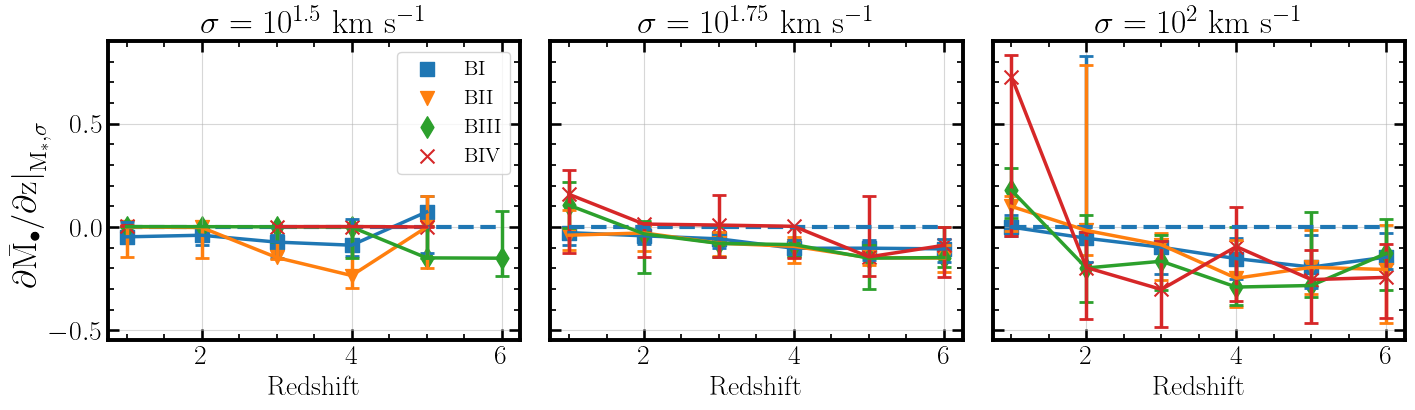

In [50]:
redshifts=np.arange(1,7)
colors = ['#1f77b4','#ff7f0e','#2ca02c','#d62728']
markers = ["s","v","d","x"]
sizes = [100,100,120,100]
titles = [r'$\sigma = 10^{1.5}\ \mathrm{km\ s^{-1}}$',r'$\sigma = 10^{1.75}\ \mathrm{km\ s^{-1}}$',r'$\sigma = 10^{2}\ \mathrm{km\ s^{-1}}$']
sigmas = [1.5,1.75,2]

fig,axs = plt.subplots(1,3,figsize = (15,4.5),sharey=True,sharex=True)

for i in range(len(sigmas)):
    axs[i].errorbar(redshifts,dmdz_mstar[i][0],[RHS_comp3_cint[0,0,i,:],RHS_comp3_cint[1,0,i,:]],color = colors[0],lw=2.5,capsize=5,capthick=2)
    axs[i].errorbar(redshifts,dmdz_mstar[i][1],[RHS_comp3_cint[0,1,i,:],RHS_comp3_cint[1,1,i,:]],color = colors[1],lw=2.5,capsize=5,capthick=2)
    axs[i].errorbar(redshifts,dmdz_mstar[i][2],[RHS_comp3_cint[0,2,i,:],RHS_comp3_cint[1,2,i,:]],color = colors[2],lw=2.5,capsize=5,capthick=2)
    axs[i].errorbar(redshifts,dmdz_mstar[i][3],[RHS_comp3_cint[0,3,i,:],RHS_comp3_cint[1,3,i,:]],color = colors[3],lw=2.5,capsize=5,capthick=2)

    axs[i].scatter(redshifts,dmdz_mstar[i][0],color = colors[0],marker=markers[0],s=sizes[0],label = 'BI')
    axs[i].scatter(redshifts,dmdz_mstar[i][1],color = colors[1],marker=markers[1],s=sizes[1],label = 'BII')
    axs[i].scatter(redshifts,dmdz_mstar[i][2],color = colors[2],marker=markers[2],s=sizes[2],label = 'BIII')
    axs[i].scatter(redshifts,dmdz_mstar[i][3],color = colors[3],marker=markers[3],s=sizes[3],label = 'BIV')
    
for i in range(len(axs)):
    ax = axs[i]
    ax.set_title(titles[i])
    ax.grid(alpha=0.5)
    ax.set_xlabel('Redshift')
    ax.hlines(0,1,6,lw=3,ls='--')
    
fig.supylabel(r'$\partial\mathrm{\bar{M_\bullet}/\partial z}\big|_{\mathrm{M}_*,\sigma}$',x=0.05)
axs[0].legend(fontsize=15)
fig.tight_layout()

fig.savefig('Plots/Paper_Figs/M_sigma_fixed_sigma_mstar_t.pdf', bbox_inches='tight')

## Full comparison plot:

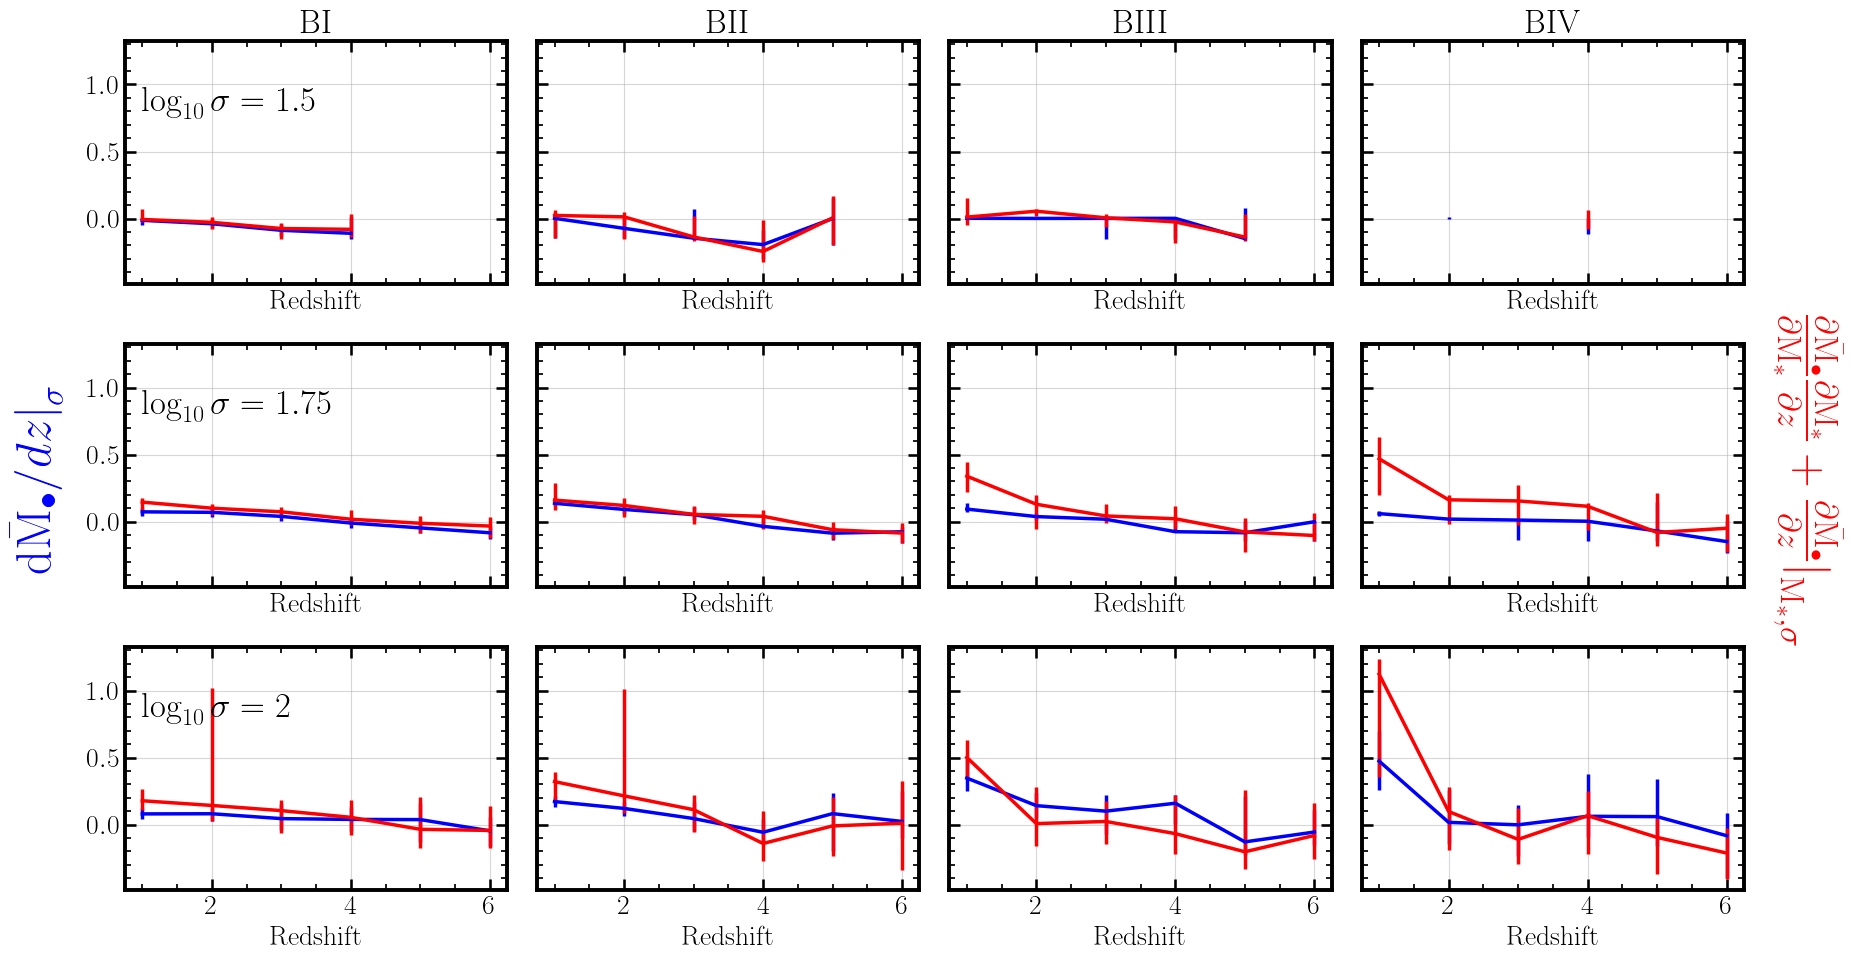

In [51]:
redshifts=np.arange(1,7)
titles = ['BI','BII','BIII','BIV']

fig,axs = plt.subplots(3,4,figsize = (18,10),sharey=True,sharex=True)

for i in range(len(sigmas)):

    axs[i,0].errorbar(redshifts,dmbh_dz[i][0],[LHS_cint[0,0,i,:],LHS_cint[1,0,i,:]],color = 'blue',lw=2.5)
    axs[i,1].errorbar(redshifts,dmbh_dz[i][1],[LHS_cint[0,1,i,:],LHS_cint[1,1,i,:]],color = 'blue',lw=2.5)
    axs[i,2].errorbar(redshifts,dmbh_dz[i][2],[LHS_cint[0,2,i,:],LHS_cint[1,2,i,:]],color = 'blue',lw=2.5)
    axs[i,3].errorbar(redshifts,dmbh_dz[i][3],[LHS_cint[0,3,i,:],LHS_cint[1,3,i,:]],color = 'blue',lw=2.5)

    axs[i,0].errorbar(redshifts,rhs[i][0],[RHS_cint[0,0,i,:],RHS_cint[1,0,i,:]],color = 'red',lw=2.5)
    axs[i,1].errorbar(redshifts,rhs[i][1],[RHS_cint[0,1,i,:],RHS_cint[1,1,i,:]],color = 'red',lw=2.5)
    axs[i,2].errorbar(redshifts,rhs[i][2],[RHS_cint[0,2,i,:],RHS_cint[1,2,i,:]],color = 'red',lw=2.5)
    axs[i,3].errorbar(redshifts,rhs[i][3],[RHS_cint[0,3,i,:],RHS_cint[1,3,i,:]],color = 'red',lw=2.5)

for i in range(len(axs.flatten())):
    ax = axs.flatten()[i]
    if i < 4:
        ax.set_title(titles[i])
    ax.grid(alpha=0.5)
    ax.set_xlabel('Redshift')
    
axs[0,0].text(1,0.8,r'$\log_{10}\sigma = 1.5$',fontsize=25)
axs[1,0].text(1,0.8,r'$\log_{10}\sigma = 1.75$',fontsize=25)
axs[2,0].text(1,0.8,r'$\log_{10}\sigma = 2$',fontsize=25)

fig.text(1.0, 0.5, r'$\frac{\partial \mathrm{\bar{M}_{\bullet}}}{\partial \mathrm{M}_*}\frac{\partial \mathrm{M}_*}{\partial z} + \frac{\partial \mathrm{\bar{M}_{\bullet}}}{\partial z}\big|_{\mathrm{M}_*,\sigma}$', 
         va='center', rotation=-90, fontsize=35,color='red')
fig.supylabel(r'$\mathrm{d\bar{M}_\bullet}/dz \biggr|_\sigma$',fontsize=35,color='blue')

fig.tight_layout()
fig.savefig('Plots/Paper_Figs/dM_dz_3rows.pdf',bbox_inches='tight')

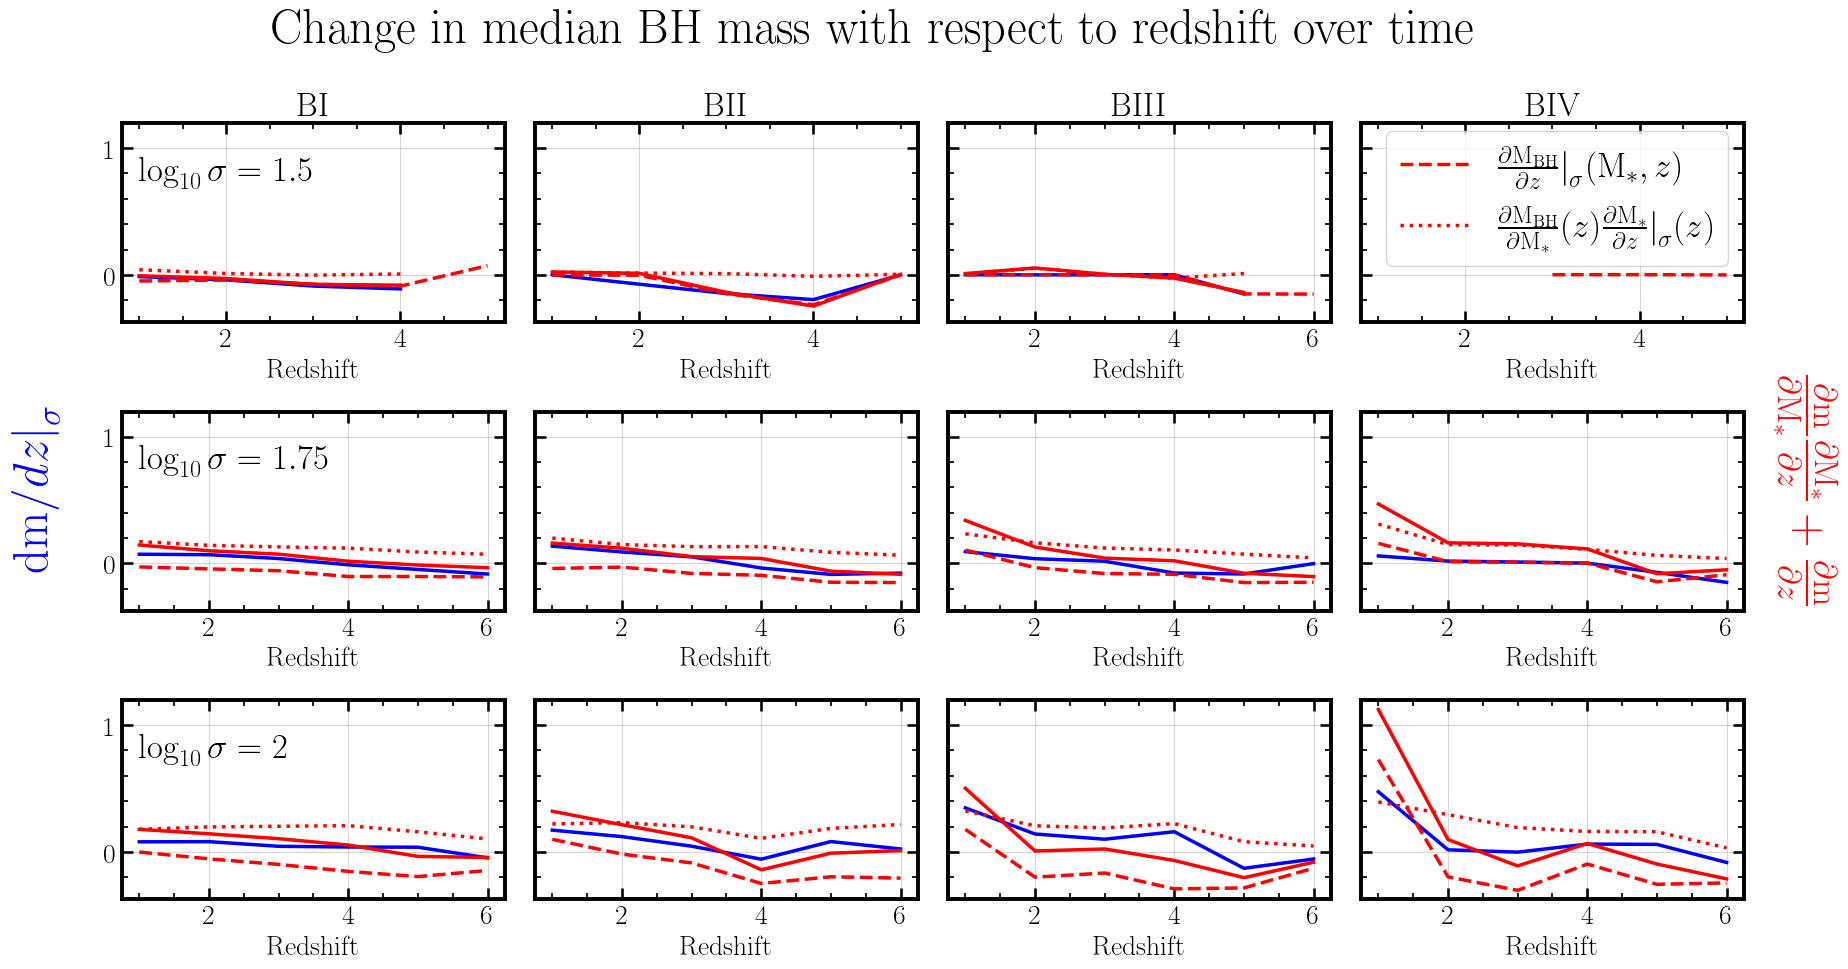

In [52]:
redshifts=np.arange(1,7)
titles = ['BI','BII','BIII','BIV']

fig,axs = plt.subplots(3,4,figsize = (18,10),sharey=True)

for i in range(len(sigmas)):

    if i == 0:
        axs[i,0].plot(redshifts,dmbh_dz[i][0],color = 'blue',lw=2.5)
        axs[i,1].plot(redshifts,dmbh_dz[i][1],color = 'blue',lw=2.5)
        axs[i,2].plot(redshifts,dmbh_dz[i][2],color = 'blue',lw=2.5)
        axs[i,3].plot(redshifts,dmbh_dz[i][3],color = 'blue',lw=2.5)

        axs[i,0].plot(redshifts,rhs[i][0],color = 'red',lw=2.5)
        axs[i,1].plot(redshifts,rhs[i][1],color = 'red',lw=2.5)
        axs[i,2].plot(redshifts,rhs[i][2],color = 'red',lw=2.5)
        axs[i,3].plot(redshifts,rhs[i][3],color = 'red',lw=2.5)

        axs[i,0].plot(redshifts,dmdz_mstar[i][0],color = 'red',lw=2.5,ls='--',label = r'$\frac{\partial \mathrm{M_{BH}}}{\partial z}\biggr|_{\sigma}(\mathrm{M}_*,z)$')
        axs[i,1].plot(redshifts,dmdz_mstar[i][1],color = 'red',lw=2.5,ls='--')
        axs[i,2].plot(redshifts,dmdz_mstar[i][2],color = 'red',lw=2.5,ls='--')
        axs[i,3].plot(redshifts,dmdz_mstar[i][3],color = 'red',lw=2.5,ls='--')

        axs[i,0].plot(redshifts,rhs_comp1[i][0],color = 'red',lw=2.5,ls=':',label=r'$\frac{\partial \mathrm{M_{BH}}}{\partial \mathrm{M_*}}(z)\frac{\partial \mathrm{M_*}}{\partial z}\biggr|_\sigma(z)$')
        axs[i,1].plot(redshifts,rhs_comp1[i][1],color = 'red',lw=2.5,ls=':')
        axs[i,2].plot(redshifts,rhs_comp1[i][2],color = 'red',lw=2.5,ls=':')
        axs[i,3].plot(redshifts,rhs_comp1[i][3],color = 'red',lw=2.5,ls=':')
        
    else:
        axs[i,0].plot(redshifts,dmbh_dz[i][0],color = 'blue',lw=2.5)
        axs[i,1].plot(redshifts,dmbh_dz[i][1],color = 'blue',lw=2.5)
        axs[i,2].plot(redshifts,dmbh_dz[i][2],color = 'blue',lw=2.5)
        axs[i,3].plot(redshifts,dmbh_dz[i][3],color = 'blue',lw=2.5)

        axs[i,0].plot(redshifts,rhs[i][0],color = 'red',lw=2.5)
        axs[i,1].plot(redshifts,rhs[i][1],color = 'red',lw=2.5)
        axs[i,2].plot(redshifts,rhs[i][2],color = 'red',lw=2.5)
        axs[i,3].plot(redshifts,rhs[i][3],color = 'red',lw=2.5)

        axs[i,0].plot(redshifts,dmdz_mstar[i][0],color = 'red',lw=2.5,ls='--')
        axs[i,1].plot(redshifts,dmdz_mstar[i][1],color = 'red',lw=2.5,ls='--')
        axs[i,2].plot(redshifts,dmdz_mstar[i][2],color = 'red',lw=2.5,ls='--')
        axs[i,3].plot(redshifts,dmdz_mstar[i][3],color = 'red',lw=2.5,ls='--')

        axs[i,0].plot(redshifts,rhs_comp1[i][0],color = 'red',lw=2.5,ls=':')
        axs[i,1].plot(redshifts,rhs_comp1[i][1],color = 'red',lw=2.5,ls=':')
        axs[i,2].plot(redshifts,rhs_comp1[i][2],color = 'red',lw=2.5,ls=':')
        axs[i,3].plot(redshifts,rhs_comp1[i][3],color = 'red',lw=2.5,ls=':')

for i in range(len(axs.flatten())):
    ax = axs.flatten()[i]
    if i < 4:
        ax.set_title(titles[i])
    ax.grid(alpha=0.5)
    ax.set_xlabel('Redshift')
    
axs[0,0].text(1,0.75,r'$\log_{10}\sigma = 1.5$',fontsize=25)
axs[1,0].text(1,0.75,r'$\log_{10}\sigma = 1.75$',fontsize=25)
axs[2,0].text(1,0.75,r'$\log_{10}\sigma = 2$',fontsize=25)

fig.text(1.0, 0.5, r'$\frac{\partial \mathrm{m}}{\partial \mathrm{M}_*}\frac{\partial \mathrm{M}_*}{\partial z} + \frac{\partial \mathrm{m}}{\partial z}$', 
         va='center', rotation=-90, fontsize=35,color='red')
fig.supylabel(r'$\mathrm{dm}/dz \biggr|_\sigma$',fontsize=35,color='blue')
fig.legend(fontsize=25,loc=(0.75,0.725))

fig.suptitle('Change in median BH mass with respect to redshift over time',fontsize=35)
fig.tight_layout()
fig.savefig('Plots/dM_dz_3rows_4curves.pdf',bbox_inches='tight')